# Trabajo

## Instalar librerias

In [8]:
!pip install openpyxl missingno scikit-learn xgboost tensorflow scikeras pymannkendall

## Importar librerias

In [10]:
# Manipulacion y tratamiento de datos
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Graficas
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pymannkendall as mk
from matplotlib.colors import LinearSegmentedColormap
# Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
# Redes neuronales
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
# Metricas
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
# Guardar y cargar modelos
import joblib

## Carga de archivos

In [12]:
df = pd.read_excel('DATASET VIH.xlsx', sheet_name='Original')
casos_anuales_df = pd.read_excel('DATASET VIH.xlsx', sheet_name='Numero de Casos Anual')
casos_mensuales_df = pd.read_excel('DATASET VIH.xlsx', sheet_name='Numero de Casos Meses')

In [14]:
df.sample(5)

,Semana,Año,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,mes_caso,Mes,Población
1698,6.0,2019.0,NaN,M,4.0,20-24,2.0,Febrero,2483545.0
3600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15085,51.0,2017.0,NaN,M,NaN,25-29,12.0,Diciembre,2385018.0
8707,29.0,2018.0,NaN,M,NaN,25-29,7.0,Julio,2427129.0
12981,43.0,2019.0,COLOMBIA,M,NaN,25-29,10.0,Octubre,2483545.0


## EDA

In [16]:
df.head()

,Semana,Año,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,mes_caso,Mes,Población
0,1.0,2012.0,COLOMBIA,M,NaN,60-64,1.0,Enero,2240690.0
1,1.0,2012.0,COLOMBIA,M,NaN,55-59,1.0,Enero,2240690.0
2,1.0,2012.0,COLOMBIA,M,NaN,30-34,1.0,Enero,2240690.0
3,1.0,2012.0,COLOMBIA,M,NaN,30-34,1.0,Enero,2240690.0
4,1.0,2012.0,COLOMBIA,M,NaN,20-24,1.0,Enero,2240690.0


In [18]:
df.tail()

,Semana,Año,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,mes_caso,Mes,Población
15465,53.0,2020.0,COLOMBIA,M,2.0,60-64,12.0,Diciembre,2519592.0
15466,53.0,2020.0,COLOMBIA,F,3.0,40-44,12.0,Diciembre,2519592.0
15467,53.0,2020.0,COLOMBIA,M,3.0,25-29,12.0,Diciembre,2519592.0
15468,53.0,2020.0,COLOMBIA,F,3.0,55-59,12.0,Diciembre,2519592.0
15469,53.0,2020.0,COLOMBIA,M,2.0,15-19,12.0,Diciembre,2519592.0


In [20]:
df.shape

(15470, 9)

El dataframe es de los registros de VIH en medellín, cada registro es un paciente positivo, se observan muchos registros repetidos, esto puede ser a que originalmente en cada registro se usaba la cedula de los pacientes, pero a la hora de hacer publico los datos se elimino este dato, dando como resultado que pacientes del mismo sexo, rango de edad, estratro, nacionalidad y que se haya detectado en la misma semana, tienen registros iguales

In [22]:
df.describe()

,Semana,Año,Estrato,mes_caso,Población
count,14491.000000,14491.000000,7144.000000,14491.000000,1.449100e+04
mean,26.616038,2018.020219,2.336366,6.563246,2.436474e+06
std,14.958349,2.904663,0.870175,3.427417,1.046431e+05
min,1.000000,2012.000000,0.000000,1.000000,2.240690e+06
25%,13.000000,2016.000000,2.000000,4.000000,2.351077e+06
50%,27.000000,2018.000000,2.000000,7.000000,2.427129e+06
75%,39.000000,2021.000000,3.000000,9.000000,2.549008e+06
max,53.000000,2022.000000,6.000000,12.000000,2.572350e+06


### Valores nulos

In [9]:
df.isna().sum()

,0
Semana,979
Año,979
Nombre Nacionalidad,8752
Sexo,979
Estrato,8326
Grupo Edad,979
mes_caso,979
Mes,979
Población,979


El dataset presenta muchos valores nulos, en muchas columnas , la cantidad es la misma por lo que es bueno revisar si hay algun patron

<Axes: >

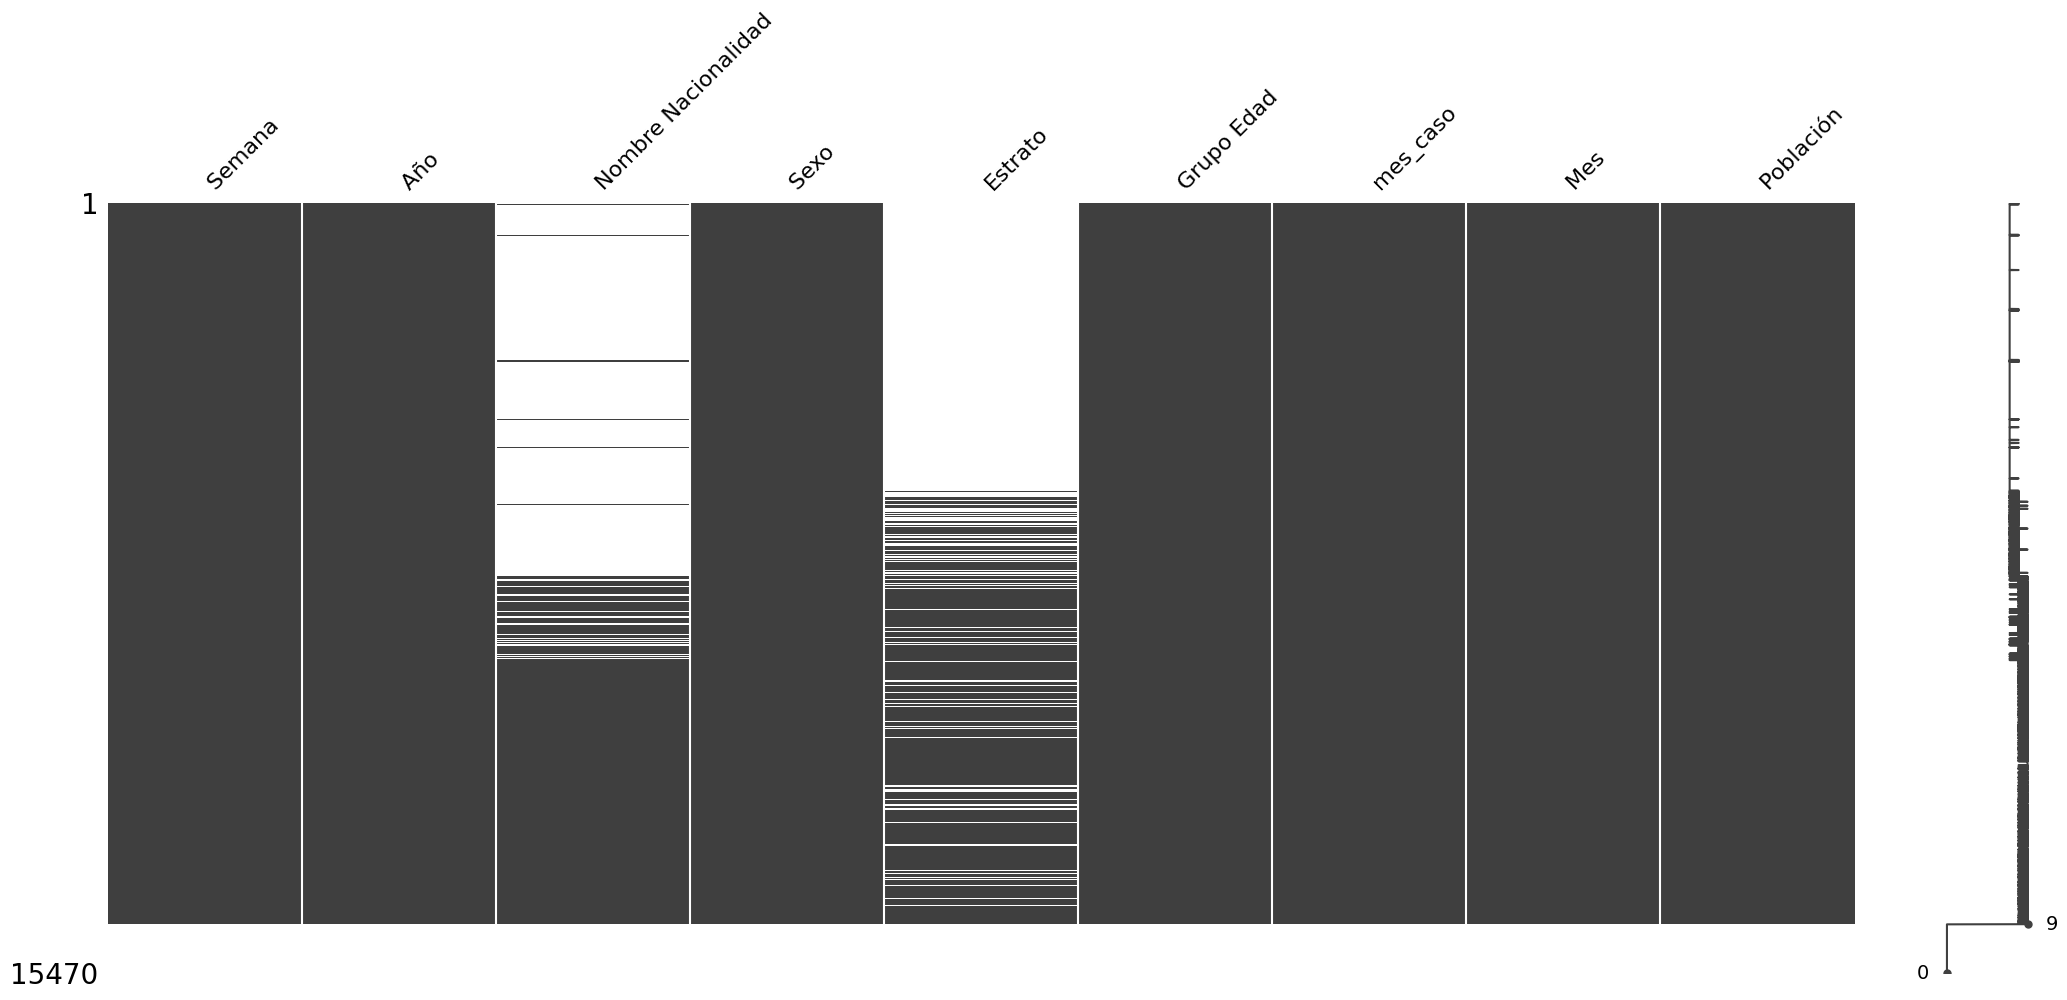

In [10]:
# Se ordenan los datos por año
df = df.sort_values(by='Año ')

# Se muestran los valores nulos
msno.matrix(df)

Se observa claramente un patron, hay muchos registros en donde todos los datos son nulos, esto se ve al final de los datos, esto puede ser debido a que al final del archivo de excel hayan muchas celdas vacias que fueron leidas erroneamente.

In [11]:
df = df.dropna(how='all')

Luego volvemos a ver los valores nulos a ver si encontramos otro patron

In [12]:
df.isna().sum()

,0
Semana,0
Año,0
Nombre Nacionalidad,7773
Sexo,0
Estrato,7347
Grupo Edad,0
mes_caso,0
Mes,0
Población,0


Ahora luego de eliminar los registros donde todos los valores eran nulos, solo quedan valores nulos en nacionalidad y estrato, esto es debido a que cuando se empezaron a registrar los datos de VIH, o se registraban estos datos, pero a medida que avanza el tiempo, estos datos fueron tomados de forma mas sistematica, por lo que no los eliminaremos.

### Creacion e nueva categoria (variables objetivo)
Debido a lo mencionado anteriormente, que cada registro es un caso se crea una nueva columna que es el porcentaje de incidencia, vale el numero de casos dividido en la poblacion. Eliminando los registros repetidos. Frecuencia es la cantidad de infectados en ese registro.

In [26]:
df['Frecuencia'] = df.groupby(df.columns.tolist()).transform('size')
df['% de incidencia'] = (df['Frecuencia'] / df['Población ']) * 100
df = df.drop_duplicates()
# Llenar con 0 las columnas Frecuencia y % de incidencia donde haya NaN
df[['Frecuencia', '% de incidencia']] = df[['Frecuencia', '% de incidencia']].fillna(0)

In [28]:
df.head()

,Semana,Año,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,mes_caso,Mes,Población,Frecuencia,% de incidencia
0,1.0,2012.0,COLOMBIA,M,NaN,60-64,1.0,Enero,2240690.0,0.0,0.0
1,1.0,2012.0,COLOMBIA,M,NaN,55-59,1.0,Enero,2240690.0,0.0,0.0
2,1.0,2012.0,COLOMBIA,M,NaN,30-34,1.0,Enero,2240690.0,0.0,0.0
4,1.0,2012.0,COLOMBIA,M,NaN,20-24,1.0,Enero,2240690.0,0.0,0.0
6,1.0,2012.0,COLOMBIA,M,NaN,35-39,1.0,Enero,2240690.0,0.0,0.0


### Valores atipicos
Para detectar valores atipicos usaremos histograma y boxplots para las variables numericas

In [30]:
print(df.columns.tolist())  # Lista de nombres de columnas


['Semana ', 'Año ', 'Nombre Nacionalidad', 'Sexo ', 'Estrato', 'Grupo Edad', 'mes_caso', 'Mes ', 'Población ', 'Frecuencia', '% de incidencia']


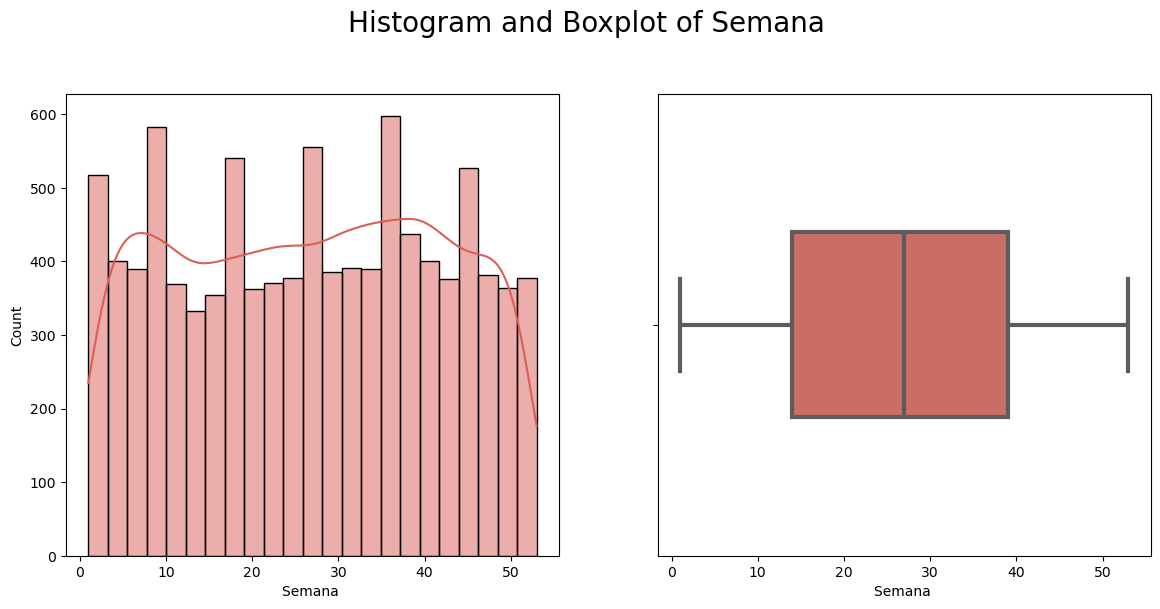

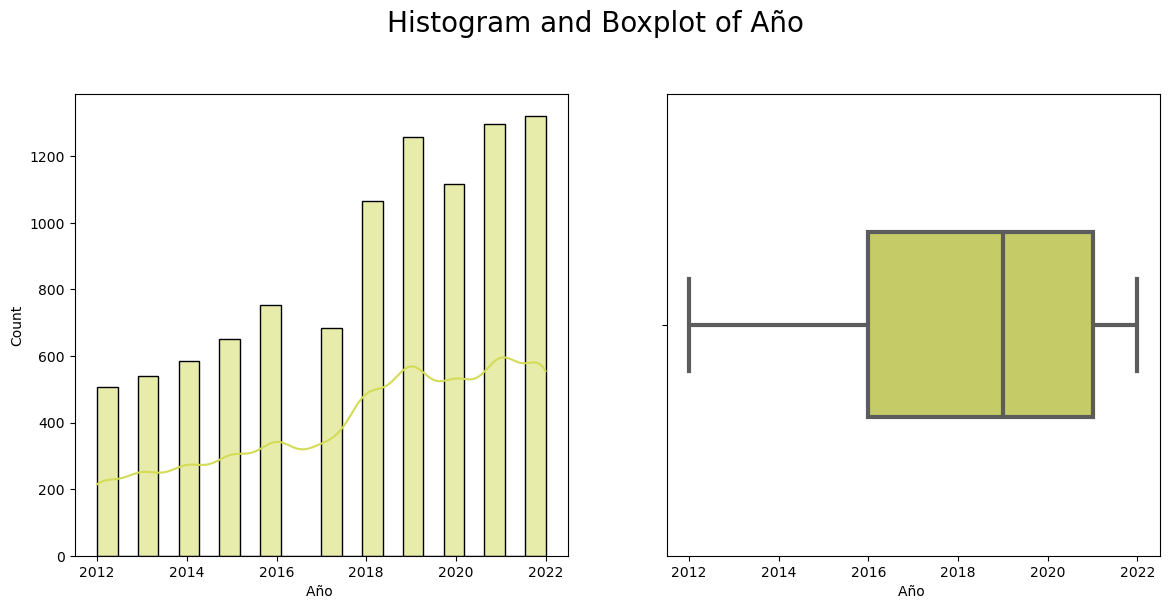

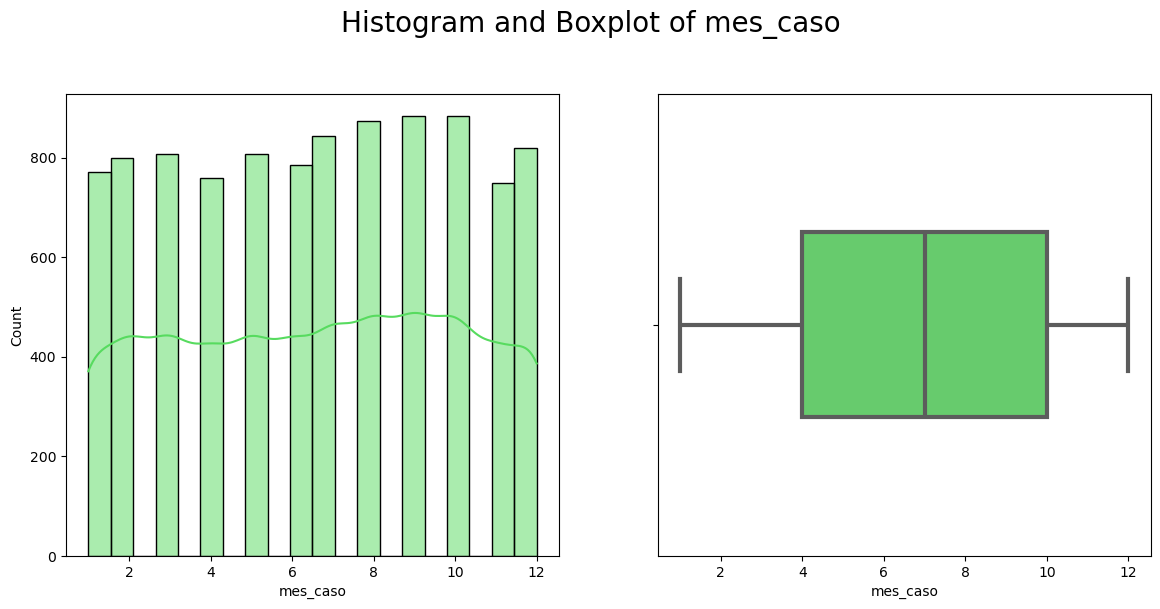

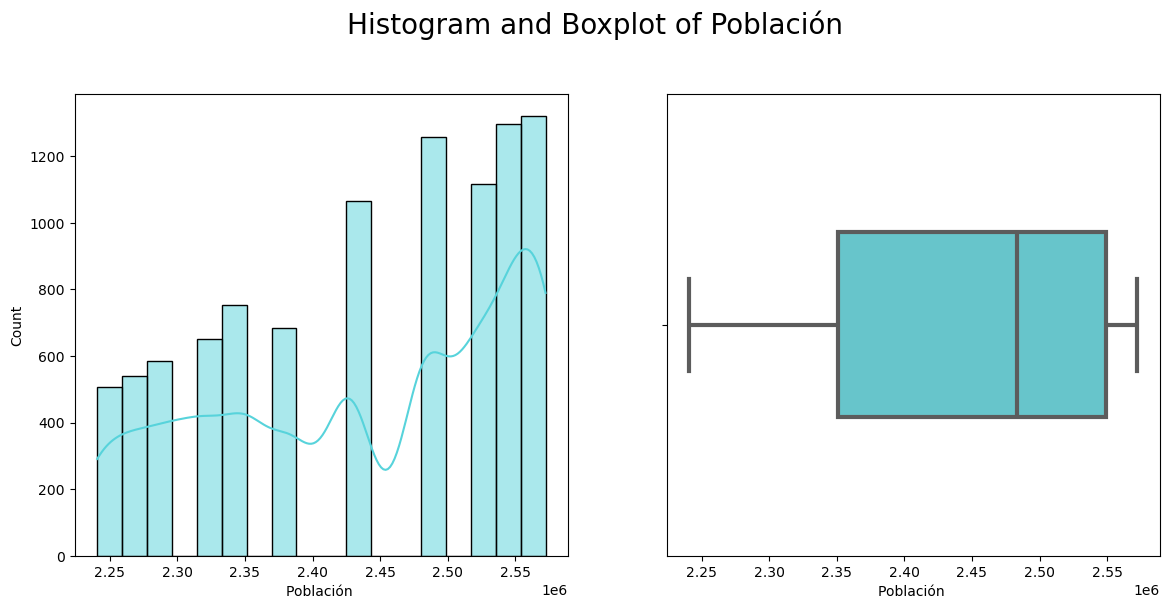

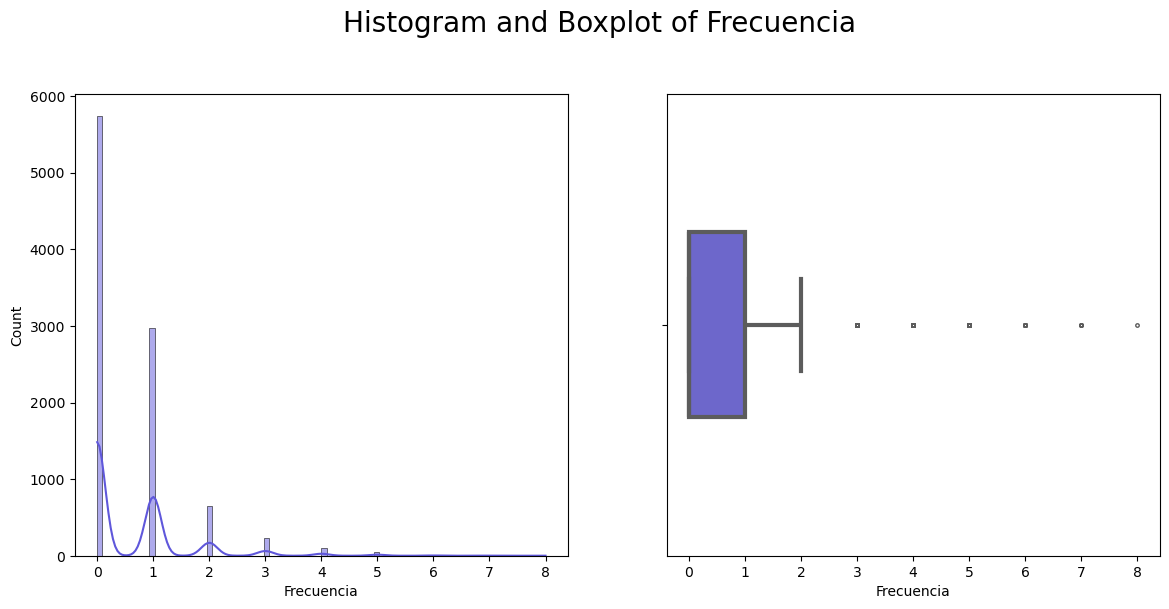

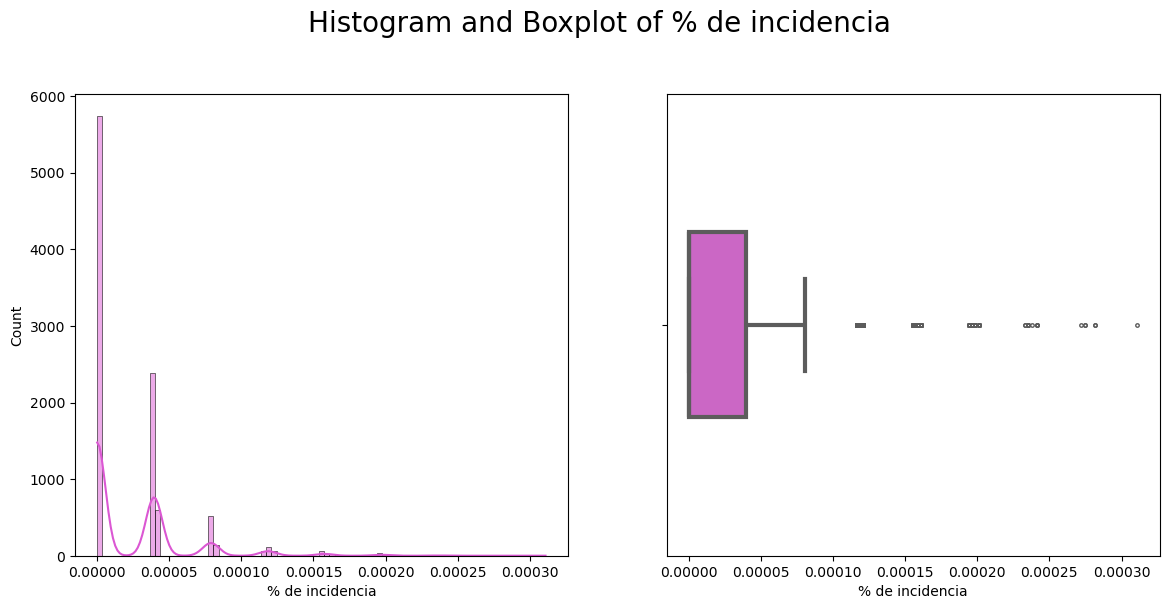

In [32]:
categoric_col = {'Sexo ', 'Grupo Edad', 'Mes ', 'Nombre Nacionalidad', 'Estrato'}
for idx, col in enumerate([i for i in df.columns if i not in categoric_col]):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    color = sns.color_palette("hls", len(df.columns) - len(categoric_col))[idx]

    sns.histplot(df, x=col, kde=True, color=color, ax=ax1)
    sns.boxplot(x=df[col], width=0.4, linewidth=3, fliersize=2.5, color=color, ax=ax2)

    fig.suptitle(f"Histogram and Boxplot of {col}", size=20, y=1.02)
    plt.show()

Se observa que no hay valores atipicos en el dataset original, sin embargo en las columnas generadas 'Frecuencia' y '% de incidencia', si presentan valores atipicos usando el boxplot, pero debido a la distribución de los datos (exponencial decreciente), no es correcto hacerse para los datos atipicos en esta ocacion ya que no es tan util si la distribucion es asimetrica, dando muchos falsos positivos.

A continuación se muestra la frecuencia en los datos categoricos

In [ ]:
Evolución de los casos a traves de los años

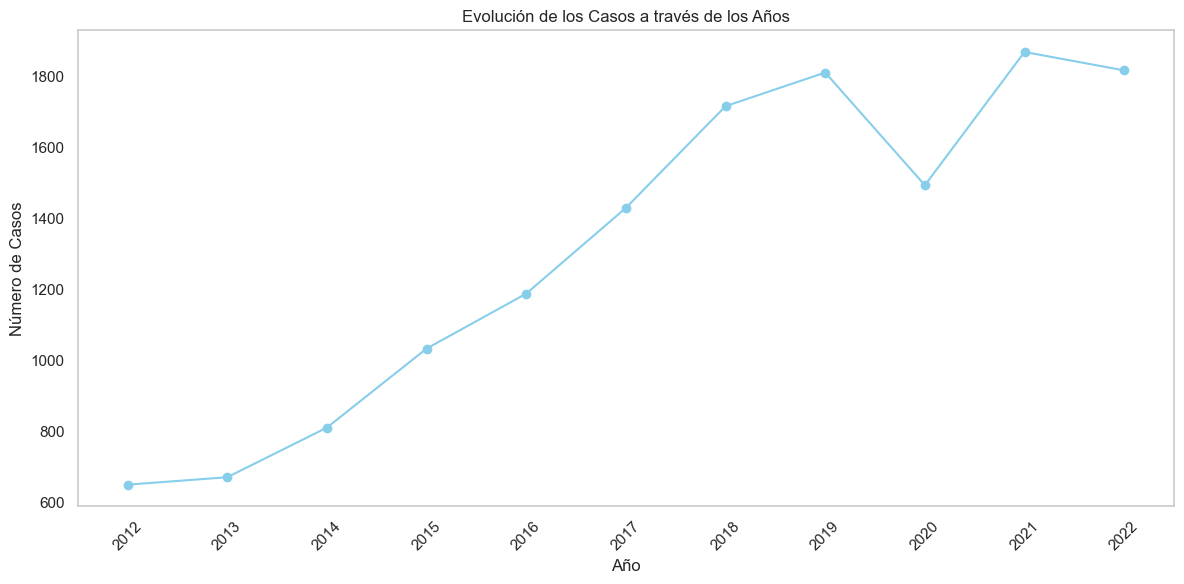

In [53]:
# Asegurarte de que las columnas de 'Año' y 'Número de Casos' están presentes en el DataFrame
# Crear una gráfica para visualizar la evolución de los casos
plt.figure(figsize=(12, 6))
plt.plot(casos_anuales_df['Año'], casos_anuales_df['Número de Casos'], marker='o', color='skyblue')

plt.title('Evolución de los Casos a través de los Años')
plt.xlabel('Año')
plt.ylabel('Número de Casos')
plt.xticks(casos_anuales_df['Año'].unique(), rotation=45)  # Asegurar que los años se muestran como enteros
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\natha\AppData\Local\Temp\ipykernel_16472\477751512.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  evolucion_mensual = casos_mensuales_df.resample('M').sum()


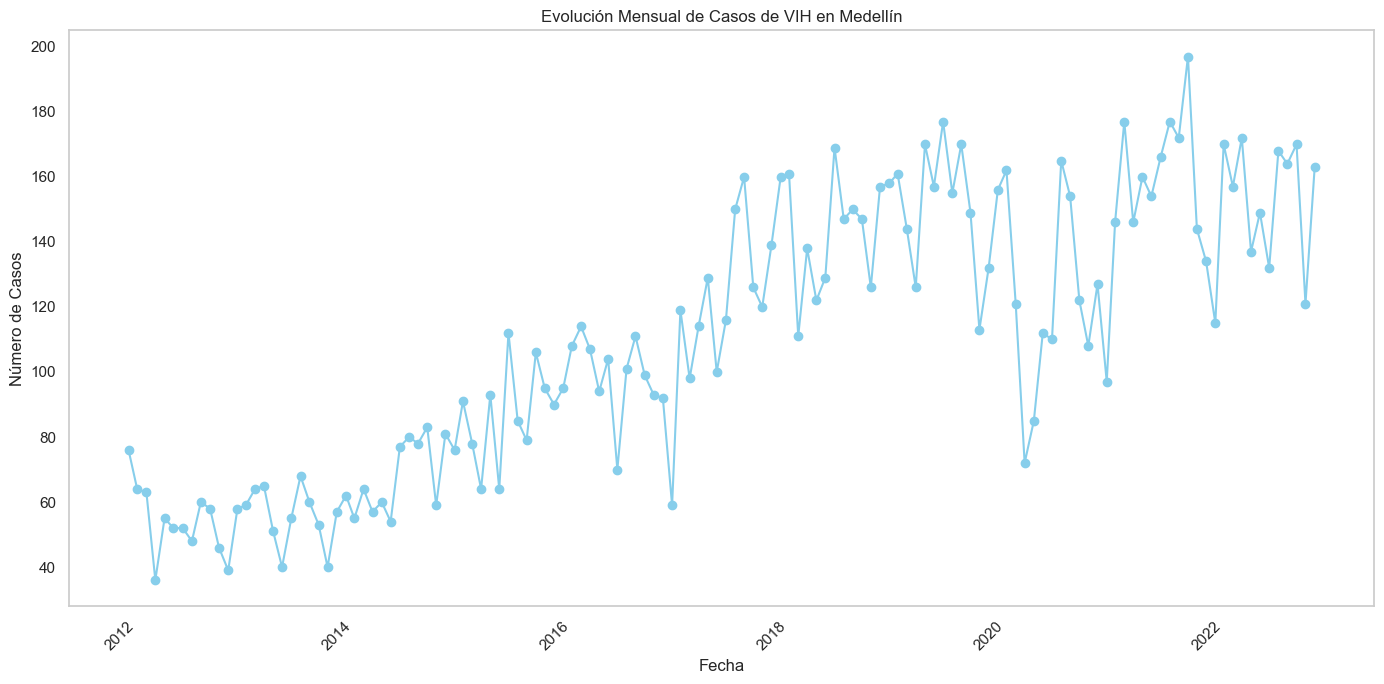

In [55]:
# Diccionario para convertir los nombres de los meses en español a números
meses = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

# Crear una nueva columna 'Mes_numero' para convertir los meses de texto a números
casos_mensuales_df['Mes_numero'] = casos_mensuales_df['Mes'].map(meses)

# Crear la columna de fecha combinando el año, mes (como número) y el día (1)
casos_mensuales_df['Fecha'] = pd.to_datetime(casos_mensuales_df['Año'].astype(str) + '-' + 
                                              casos_mensuales_df['Mes_numero'].astype(str) + '-01')

# Establecer la fecha como índice
casos_mensuales_df.set_index('Fecha', inplace=True)

# Agrupar por mes y sumar los casos para obtener la evolución mensual
evolucion_mensual = casos_mensuales_df.resample('M').sum()

# Graficar la evolución mensual de los casos
plt.figure(figsize=(14, 7))
plt.plot(evolucion_mensual.index, evolucion_mensual['Número de Casos'], marker='o', linestyle='-', color='skyblue')

# Mejorar la visualización
plt.title('Evolución Mensual de Casos de VIH en Medellín')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Mostrar la gráfica
plt.show()

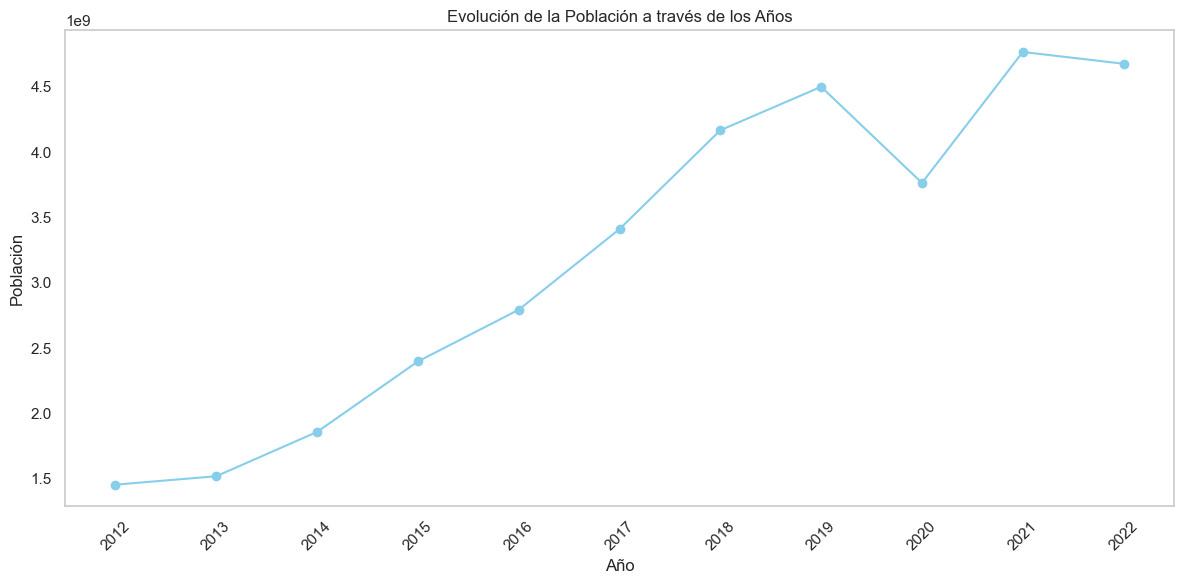

In [57]:
# Agrupar la población por año
poblacion_por_año = original_df.groupby('Año')['Población'].sum().reset_index()

# Crear una gráfica para visualizar la evolución de la población
plt.figure(figsize=(12, 6))
plt.plot(poblacion_por_año['Año'], poblacion_por_año['Población'], marker='o', color='skyblue')

plt.title('Evolución de la Población a través de los Años')
plt.xlabel('Año')
plt.ylabel('Población')
plt.xticks(poblacion_por_año['Año'].unique(), rotation=45) 
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
Distribución de Casos por Mes

     Año  Número de Casos
0   2012              649
1   2013              670
2   2014              810
3   2015             1033
4   2016             1188
5   2017             1430
6   2018             1717
7   2019             1812
8   2020             1494
9   2021             1870
10  2022             1818


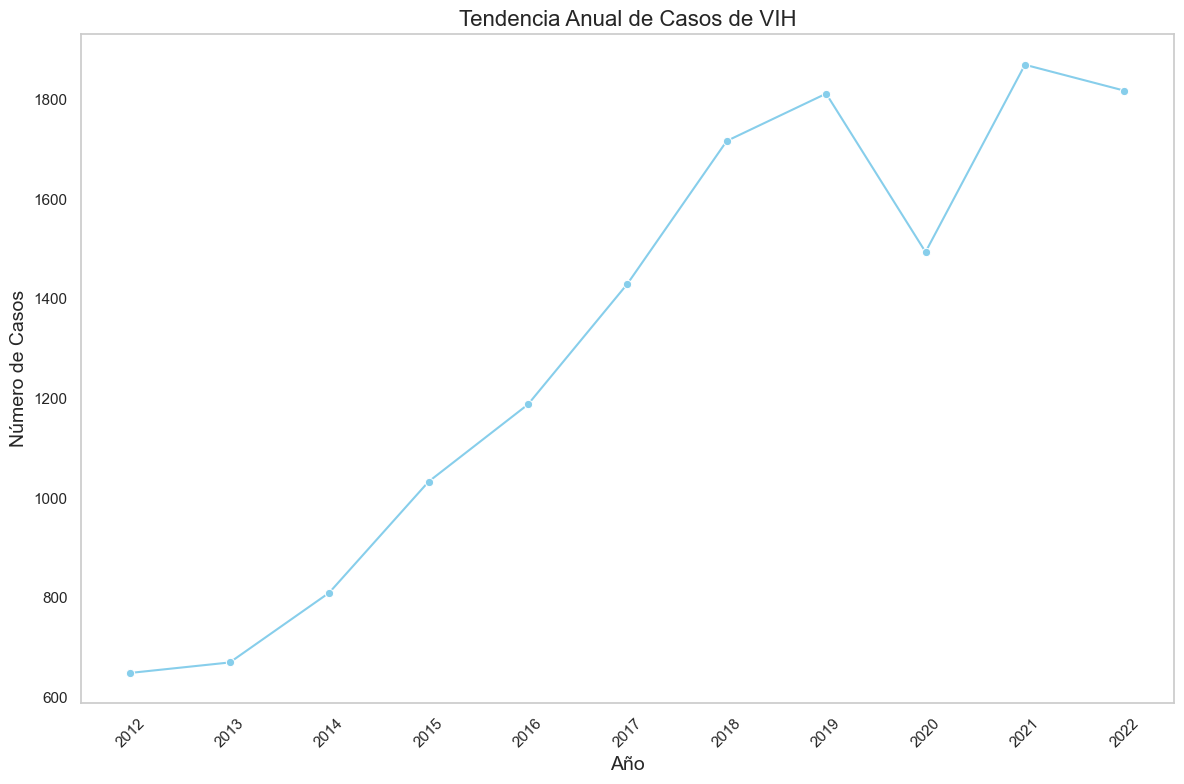

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de la hoja 'Numero de Casos Meses'
file_path = 'DATASET VIH.xlsx'
numero_casos_meses_df = pd.read_excel(file_path, sheet_name='Numero de Casos Meses')

# Limpiar los nombres de las columnas
numero_casos_meses_df.columns = numero_casos_meses_df.columns.str.strip()

# Agrupar los datos por año y sumar el número de casos
casos_por_año = numero_casos_meses_df.groupby('Año')['Número de Casos'].sum().reset_index()

# Ver los datos agrupados
print(casos_por_año)

# Crear un gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(x='Año', y='Número de Casos', data=casos_por_año, marker='o', linestyle='-', color='skyblue')

# Agregar título y etiquetas
plt.title('Tendencia Anual de Casos de VIH', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)

# Mostrar la gráfica
plt.xticks(casos_por_año['Año'], rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_16472\1404593387.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mes', y='Número de Casos', data=casos_por_mes, palette='viridis')


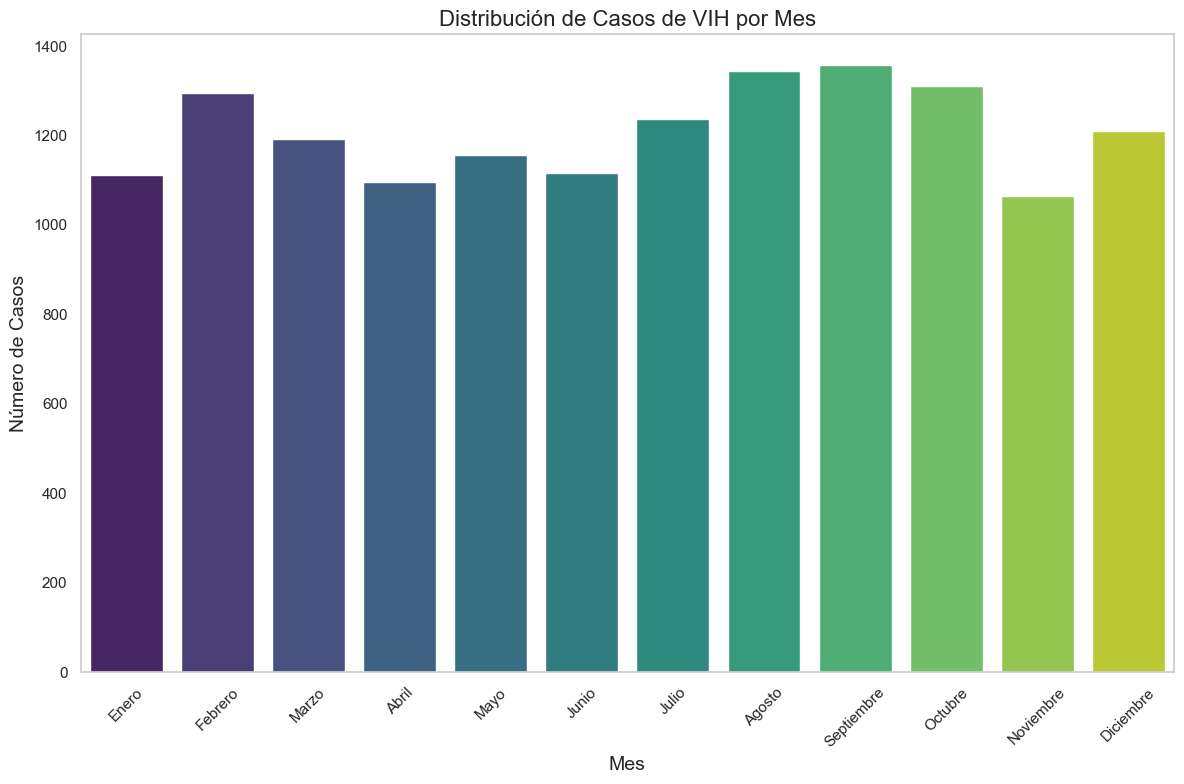

In [61]:
# Limpiar los nombres de las columnas
numero_casos_meses_df.columns = numero_casos_meses_df.columns.str.strip()

# Agrupar los datos por mes y sumar el número de casos
casos_por_mes = numero_casos_meses_df.groupby(['Mes'])['Número de Casos'].sum().reset_index()

# Definir el orden de los meses para la visualización
months_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
casos_por_mes['Mes'] = pd.Categorical(casos_por_mes['Mes'], categories=months_order, ordered=True)
casos_por_mes = casos_por_mes.sort_values('Mes')

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Mes', y='Número de Casos', data=casos_por_mes, palette='viridis')

# Agregar título y etiquetas
plt.title('Distribución de Casos de VIH por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

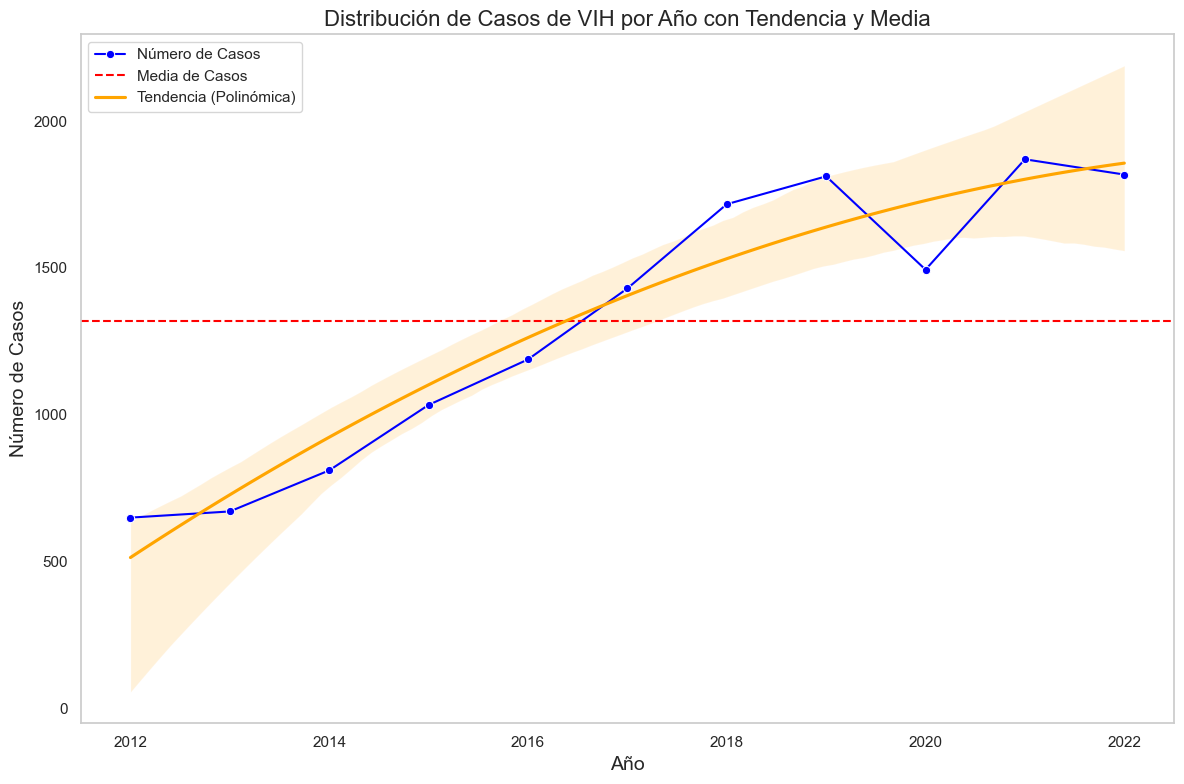

In [63]:
# Calcular el número total de casos por año
casos_por_año = numero_casos_meses_df.groupby('Año')['Número de Casos'].sum().reset_index()

# Calcular la media de casos por año
media_casos = casos_por_año['Número de Casos'].mean()

# Configurar la gráfica
plt.figure(figsize=(12, 8))
sns.lineplot(x='Año', y='Número de Casos', data=casos_por_año, marker='o', label='Número de Casos', color='blue')
plt.axhline(y=media_casos, color='red', linestyle='--', label='Media de Casos')

# Ajustar la tendencia con un modelo polinómico (grado 2)
sns.regplot(x='Año', y='Número de Casos', data=casos_por_año, scatter=False, color='orange', label='Tendencia (Polinómica)', order=2)

# Agregar título y etiquetas
plt.title('Distribución de Casos de VIH por Año con Tendencia y Media', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

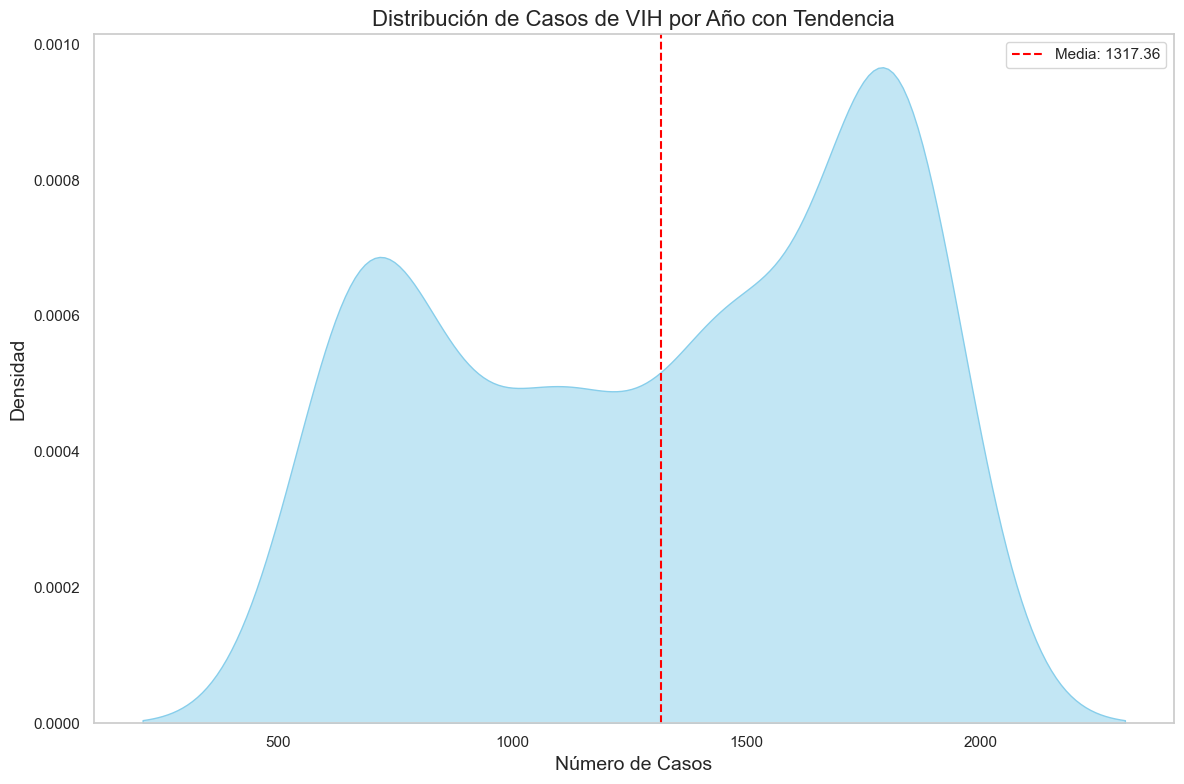

In [65]:
# Calcular la suma de casos por año
casos_por_año = numero_casos_meses_df.groupby('Año')['Número de Casos'].sum().reset_index()

# Configuración de la gráfica
plt.figure(figsize=(12, 8))

# Gráfico de densidad
sns.kdeplot(data=casos_por_año, x='Número de Casos', fill=True, color='skyblue', alpha=0.5, bw_adjust=0.5)

# Calcular la media
media = casos_por_año['Número de Casos'].mean()

# Agregar línea de media
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')

# Configuración de etiquetas y título
plt.title('Distribución de Casos de VIH por Año con Tendencia', fontsize=16)
plt.xlabel('Número de Casos', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
GRAFICA DE DISTRIBUCIÓN DE CASOS POR EDADES

C:\Users\natha\AppData\Local\Temp\ipykernel_16472\1310422179.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edad_counts.index, y=edad_counts.values, palette="viridis")


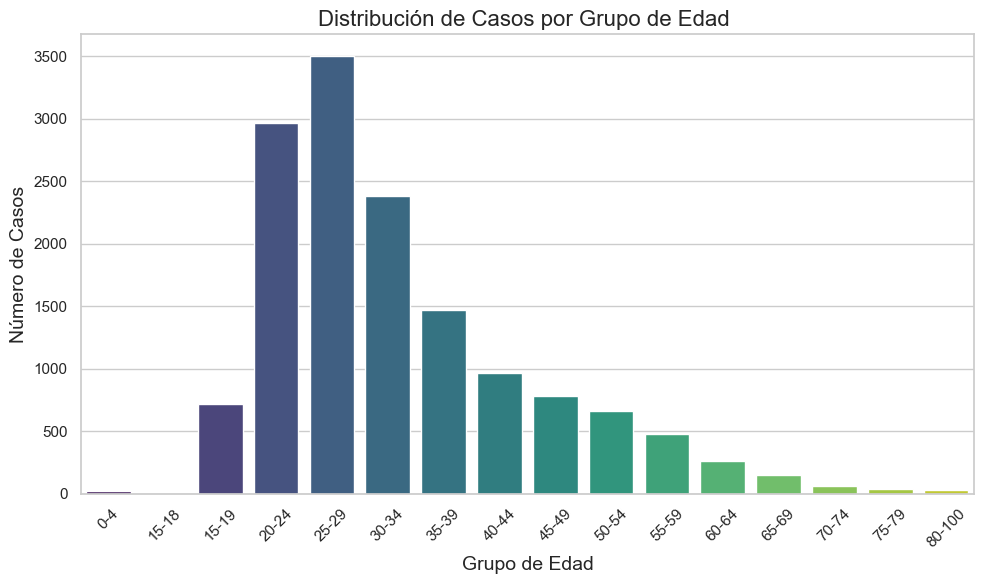

In [37]:
# Cargar el archivo y seleccionar la hoja "Original"
file_path = 'DATASET VIH.xlsx'
original_df = pd.read_excel(file_path, sheet_name='Original')

# Contar el número de casos por grupo de edad
edad_counts = original_df['Grupo Edad'].value_counts().sort_index()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x=edad_counts.index, y=edad_counts.values, palette="viridis")

# Títulos y etiquetas
plt.title("Distribución de Casos por Grupo de Edad ", fontsize=16)
plt.xlabel("Grupo de Edad", fontsize=14)
plt.ylabel("Número de Casos", fontsize=14)
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
Evolución de los casos para cada grupo de edad

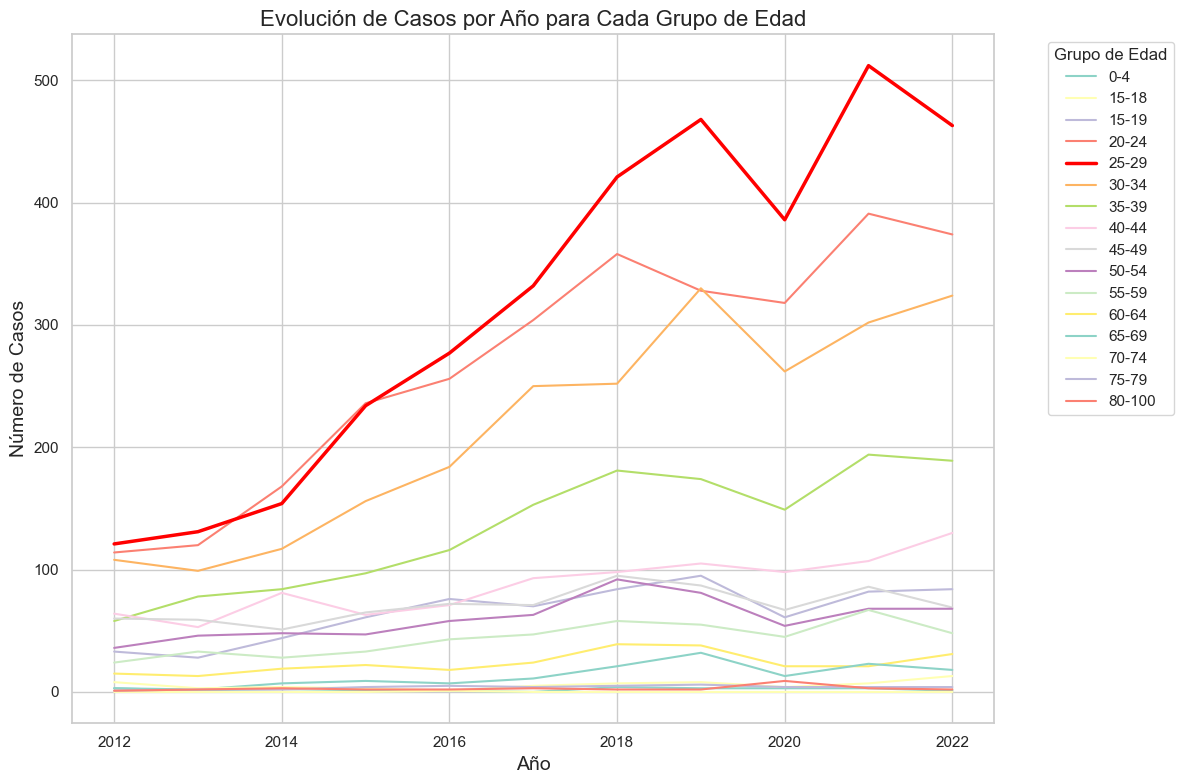

In [39]:
# Limpiar los nombres de las columnas para evitar problemas con espacios
original_df.columns = original_df.columns.str.strip()

# Agrupar los datos por año y grupo de edad, y contar el número de casos
evolucion_edades = original_df.groupby(['Año', 'Grupo Edad']).size().unstack(fill_value=0)

# Configurar colores con una paleta discreta y no muy brillante
color_palette = sns.color_palette("Set3", len(evolucion_edades.columns))

# Crear la gráfica
plt.figure(figsize=(12, 8))

# Dibujar una línea para cada grupo de edad, destacando el grupo "25-29" en rojo y más grueso
for i, grupo_edad in enumerate(evolucion_edades.columns):
    if grupo_edad == '25-29':
        plt.plot(evolucion_edades.index, evolucion_edades[grupo_edad], color='red', linewidth=2.5, label=grupo_edad)
    else:
        plt.plot(evolucion_edades.index, evolucion_edades[grupo_edad], color=color_palette[i], linewidth=1.5, label=grupo_edad)

# Títulos y etiquetas
plt.title("Evolución de Casos por Año para Cada Grupo de Edad", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Número de Casos", fontsize=14)
plt.legend(title="Grupo de Edad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
GRAFICA DE DISTRIBUCIÓN DE CASOS POR SEXO

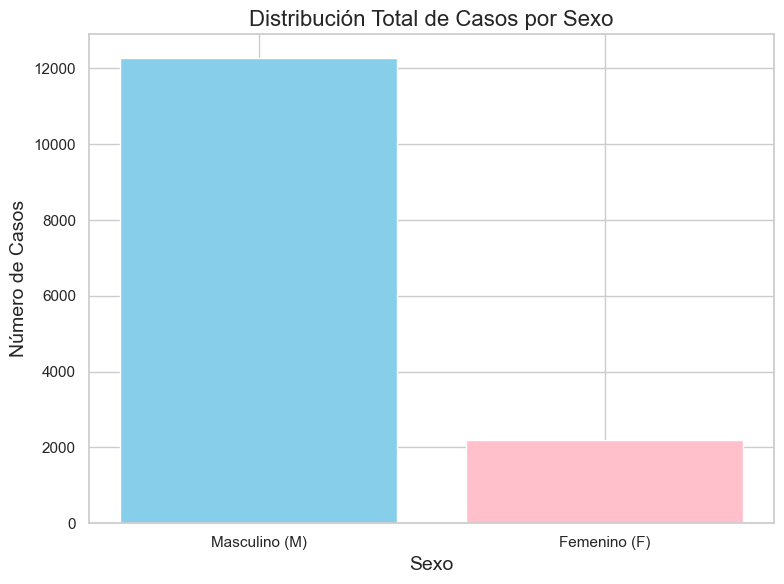

In [41]:
# Limpiar los nombres de las columnas para evitar problemas con espacios
original_df.columns = original_df.columns.str.strip()

# Contar el número total de casos para cada sexo
casos_por_sexo = original_df['Sexo'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(casos_por_sexo.index, casos_por_sexo.values, color=['skyblue', 'pink'])

# Títulos y etiquetas
plt.title("Distribución Total de Casos por Sexo", fontsize=16)
plt.xlabel("Sexo", fontsize=14)
plt.ylabel("Número de Casos", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Masculino (M)", "Femenino (F)"])

# Mostrar la gráfica
plt.tight_layout()
plt.show()

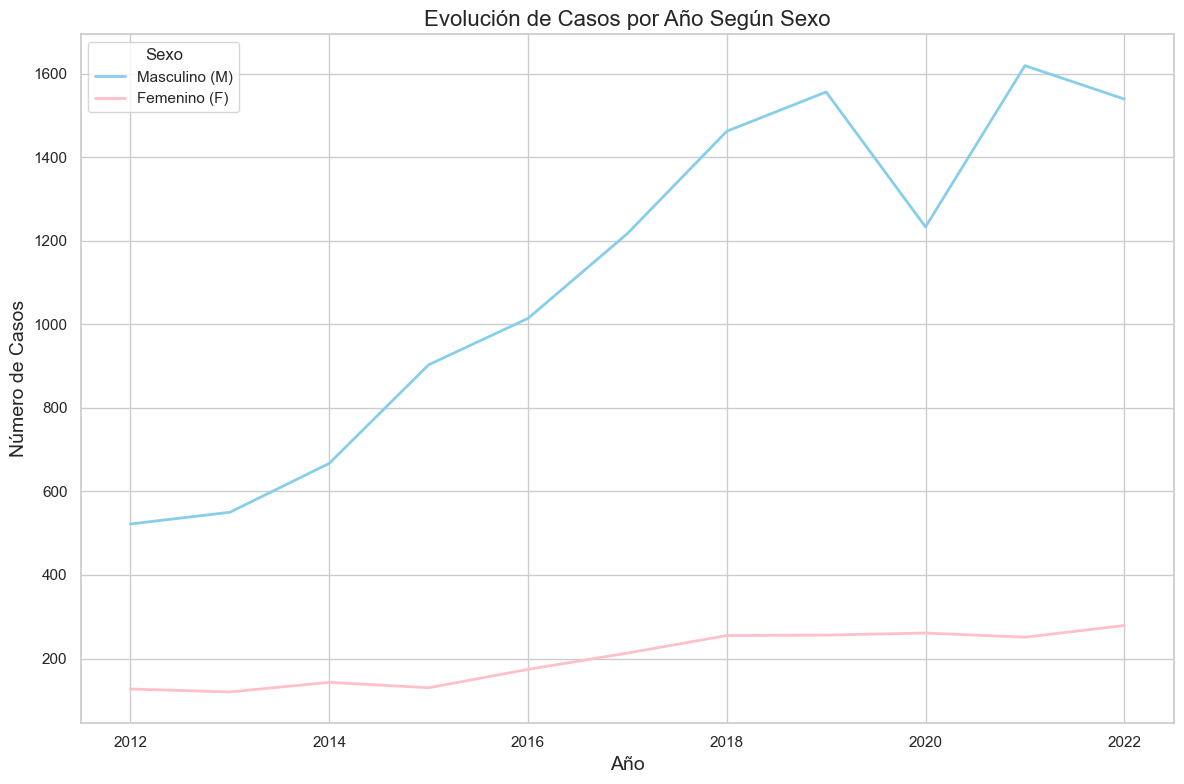

In [43]:
# Agrupar los datos por año y sexo, y contar el número de casos
evolucion_sexo = original_df.groupby(['Año', 'Sexo']).size().unstack(fill_value=0)

# Crear la gráfica
plt.figure(figsize=(12, 8))

# Dibujar una línea para cada sexo, usando azul para "M" y rosa para "F"
plt.plot(evolucion_sexo.index, evolucion_sexo['M'], color='skyblue', linewidth=2, label='Masculino (M)')
plt.plot(evolucion_sexo.index, evolucion_sexo['F'], color='pink', linewidth=2, label='Femenino (F)')

# Títulos y etiquetas
plt.title("Evolución de Casos por Año Según Sexo", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Número de Casos", fontsize=14)
plt.legend(title="Sexo")
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
CASOS POR PAIS DE ORIGEN

In [67]:
# Tabla de nacionalidades
nacionalidades = df['Nombre Nacionalidad'].value_counts().reset_index()
nacionalidades.columns = ['Nombre Nacionalidad', 'Cantidad']

#mostrar la tabla
print(nacionalidades)

   Nombre Nacionalidad  Cantidad
0             COLOMBIA      4068
1            VENEZUELA       699
2      ESTADOS UNIDOS          6
3            ARGENTINA         2
4              COMORAS         2
5               MEXICO         2
6                MALTA         1
7             PARAGUAY         1
8           AFGANISTAN         1
9               BOSNIA         1
10             ECUADOR         1
11              ESPAÑA         1
12             POLONIA         1
13              PANAMA         1
14         PUERTO RICO         1
15              BRASIL         1
16               CHILE         1
17         REINO UNIDO         1
18                CUBA         1


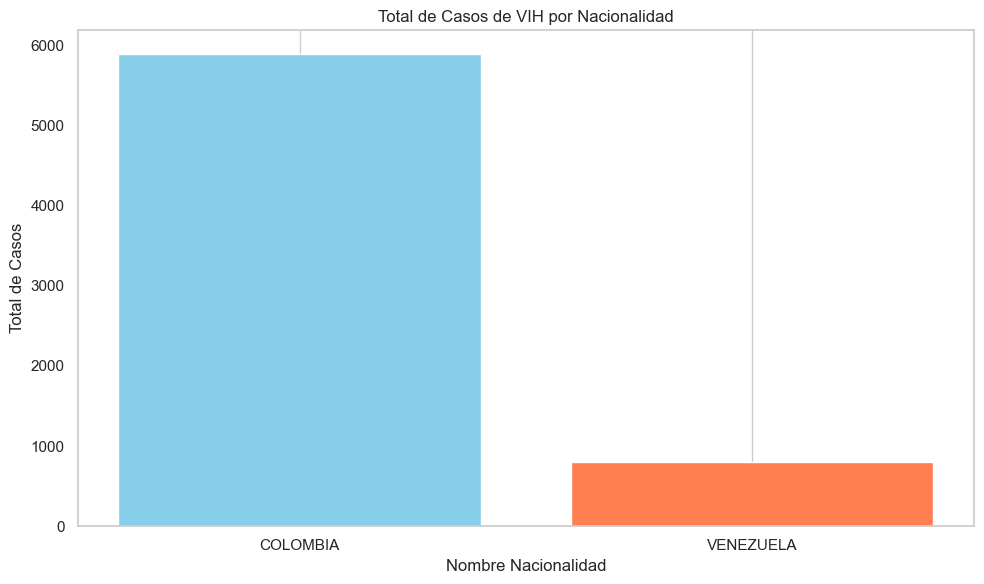

In [47]:
# Filtrar los datos solo para las nacionalidades "COLOMBIA" y "VENEZUELA"
nacionalidades_filtradas = original_df[original_df['Nombre Nacionalidad'].isin(['COLOMBIA', 'VENEZUELA'])]

# Contar los casos por año y nacionalidad
casos_por_nacionalidad = nacionalidades_filtradas.groupby(['Año', 'Nombre Nacionalidad']).size().reset_index(name='Cantidad')

# Sumar los casos totales por año para cada nacionalidad
totales_por_nacionalidad = casos_por_nacionalidad.groupby('Nombre Nacionalidad')['Cantidad'].sum().reset_index()

# Crear una gráfica para visualizar el total de casos
plt.figure(figsize=(10, 6))
plt.bar(totales_por_nacionalidad['Nombre Nacionalidad'], totales_por_nacionalidad['Cantidad'], color=['skyblue', 'coral'])
plt.title('Total de Casos de VIH por Nacionalidad')
plt.xlabel('Nombre Nacionalidad')
plt.ylabel('Total de Casos')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

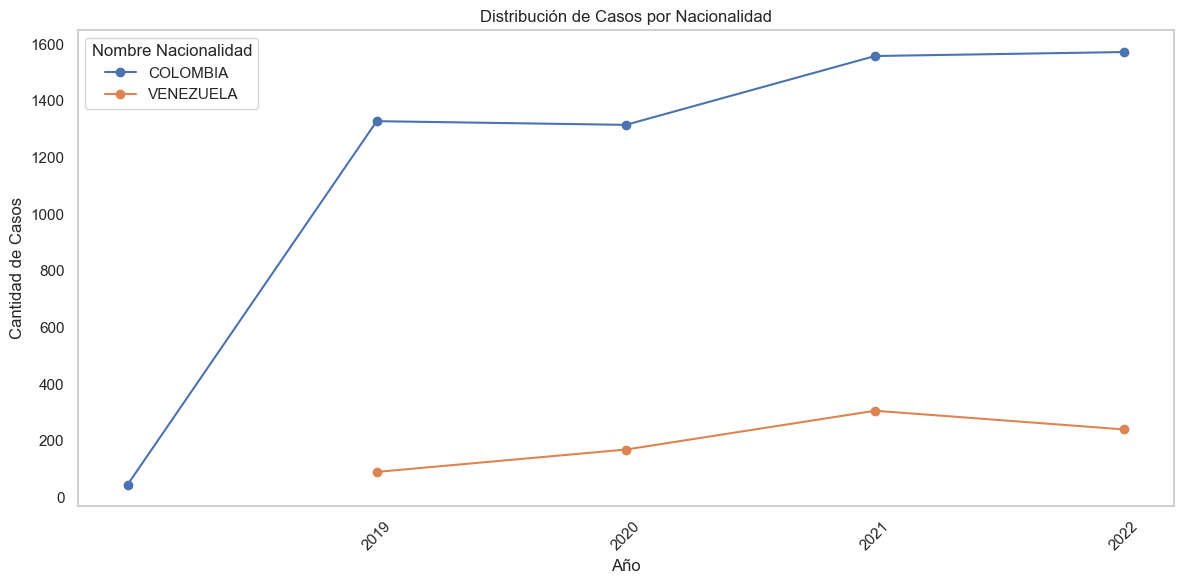

In [45]:
# Filtrar el DataFrame para incluir solo los datos de Colombia y Venezuela a partir de 2018
filtered_df = original_df[(original_df['Nombre Nacionalidad'].isin(['COLOMBIA', 'VENEZUELA'])) & (original_df['Año'] >= 2018)]

# Contar los casos por año y nacionalidad
casos_por_nacionalidad = filtered_df.groupby(['Año', 'Nombre Nacionalidad']).size().reset_index(name='Cantidad')

# Crear una gráfica para visualizar la distribución
plt.figure(figsize=(12, 6))
for nacionalidad in casos_por_nacionalidad['Nombre Nacionalidad'].unique():
    subset = casos_por_nacionalidad[casos_por_nacionalidad['Nombre Nacionalidad'] == nacionalidad]
    plt.plot(subset['Año'], subset['Cantidad'], marker='o', label=nacionalidad)

plt.title('Distribución de Casos por Nacionalidad')
plt.xlabel('Año')
plt.ylabel('Cantidad de Casos')
plt.xticks(subset['Año'].unique(), rotation=45)  
plt.legend(title='Nombre Nacionalidad')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
Análisis por Estrato Socioeconómico

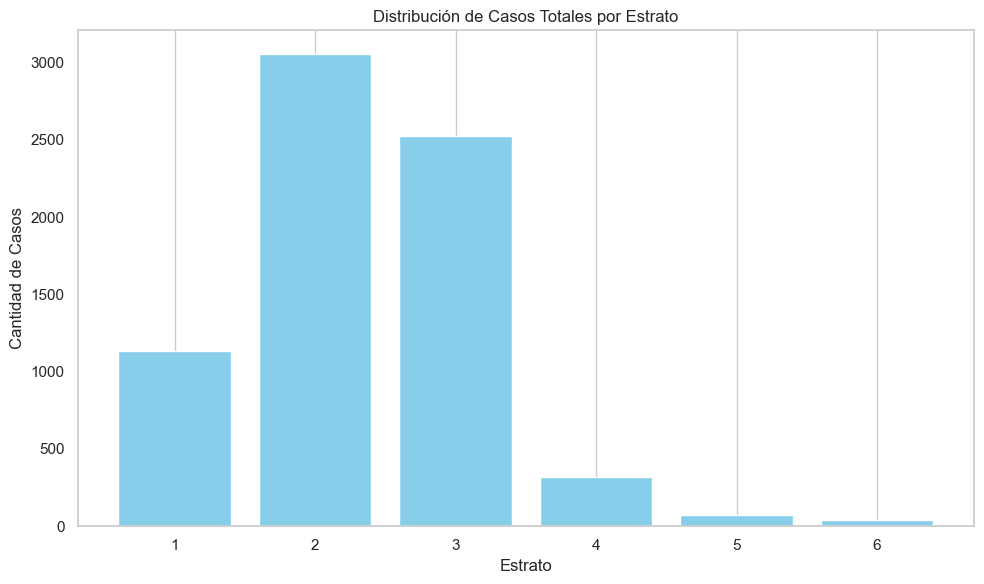

In [49]:
# Filtrar el DataFrame para omitir el estrato "0"
filtered_df = original_df[original_df['Estrato'] != 0]

# Contar los casos totales por estrato
casos_por_estrato = filtered_df['Estrato'].value_counts().sort_index()

# Crear una gráfica para visualizar la distribución
plt.figure(figsize=(10, 6))
plt.bar(casos_por_estrato.index, casos_por_estrato.values, color='skyblue')
plt.title('Distribución de Casos Totales por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Cantidad de Casos')
plt.xticks(casos_por_estrato.index.astype(int)) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

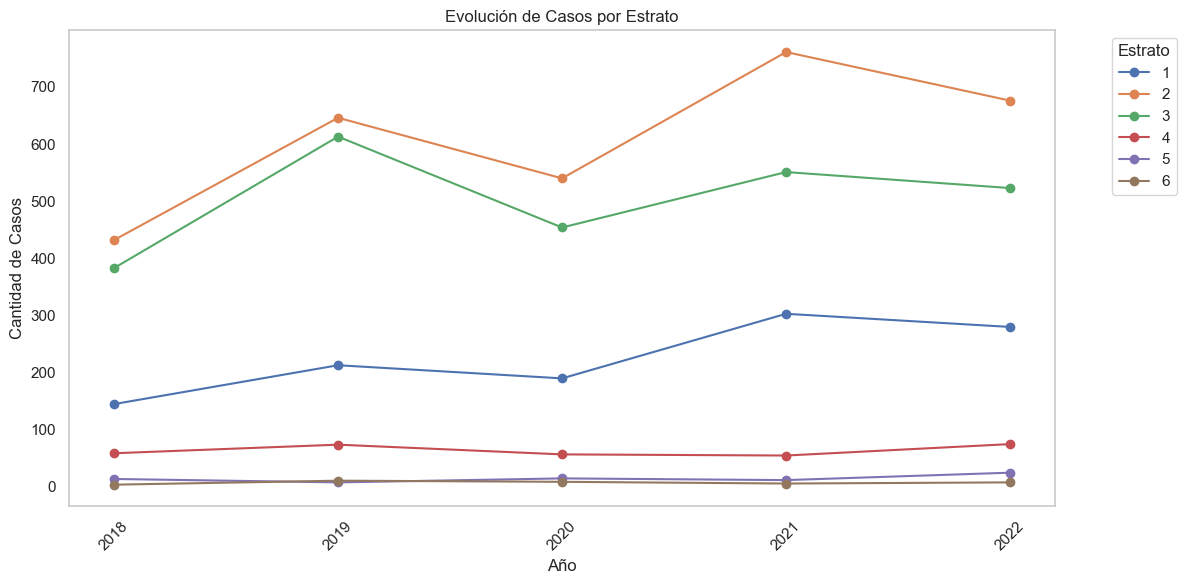

In [51]:
# Filtrar el DataFrame para omitir el estrato "0"
filtered_df = original_df[original_df['Estrato'] != 0]

# Contar los casos por año y estrato
casos_por_estrato_anio = filtered_df.groupby(['Año', 'Estrato']).size().reset_index(name='Cantidad')

# Crear una gráfica para visualizar la evolución de casos por estrato
plt.figure(figsize=(12, 6))
for estrato in casos_por_estrato_anio['Estrato'].unique():
    subset = casos_por_estrato_anio[casos_por_estrato_anio['Estrato'] == estrato]
    plt.plot(subset['Año'], subset['Cantidad'], marker='o', label=int(estrato))  # Convertir a entero

plt.title('Evolución de Casos por Estrato')
plt.xlabel('Año')
plt.ylabel('Cantidad de Casos')
plt.xticks(subset['Año'].unique(), rotation=45)  # Asegurar que los años se muestran como enteros
plt.legend(title='Estrato', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar leyenda fuera del gráfico
plt.grid()
plt.tight_layout()
plt.show()

Se observa que la enfermedad se presenta mayormente en los hombres, en todo el año y que las eddes mas propensas a contagiar la enfermedad es entre los 20 y los 34 años

Se muestran los outliers de los casos por mes

<ipython-input-18-cfc1bcddafe0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mes', y='Número de Casos', data=casos_mensuales_df, palette='Set2')


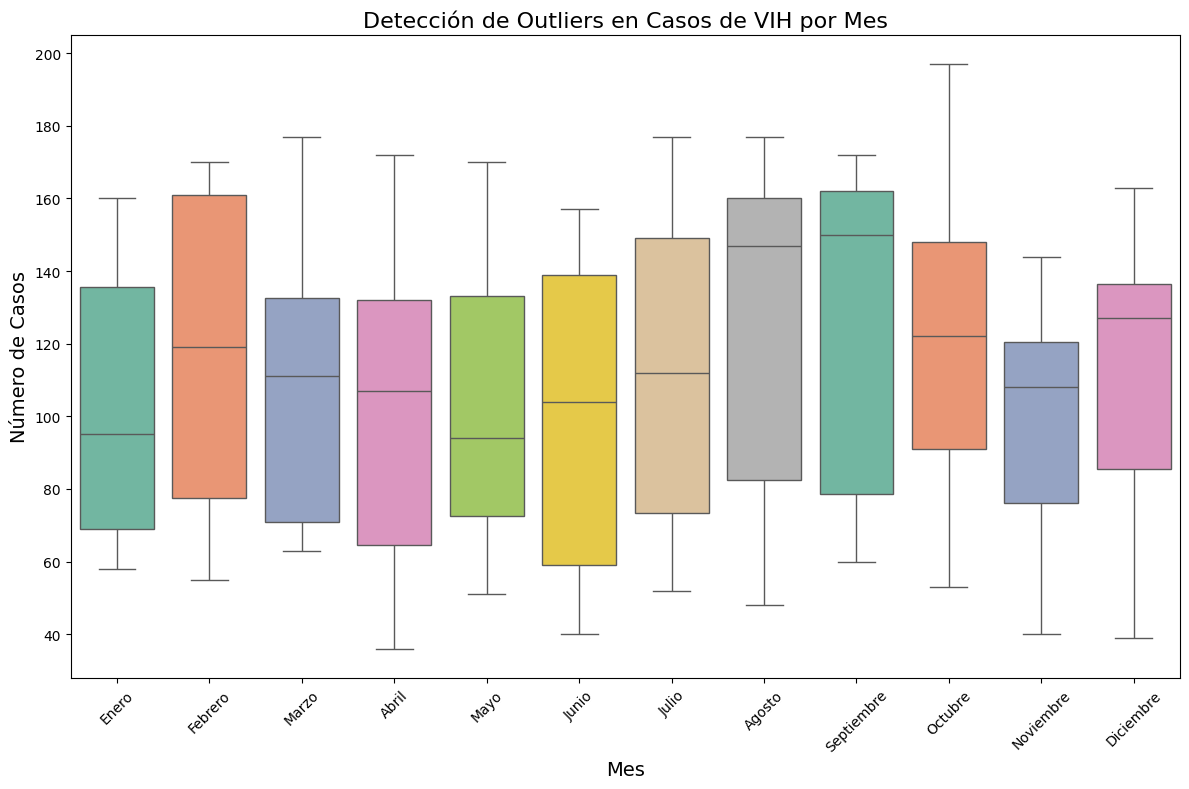

Outliers detectados:
Empty DataFrame
Columns: [Año, Mes, Número de Casos, Población , Tasa de Incidencia]
Index: []


In [18]:
# Crear un gráfico boxplot por mes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Mes', y='Número de Casos', data=casos_mensuales_df, palette='Set2')

# Agregar título y etiquetas
plt.title('Detección de Outliers en Casos de VIH por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)

# Rotar las etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Identificar outliers usando el rango intercuartílico (IQR)
Q1 = casos_mensuales_df['Número de Casos'].quantile(0.25)
Q3 = casos_mensuales_df['Número de Casos'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = casos_mensuales_df[(casos_mensuales_df['Número de Casos'] < limite_inferior) |
                                  (casos_mensuales_df['Número de Casos'] > limite_superior)]

# Mostrar los outliers
print("Outliers detectados:")
print(outliers)

### Matrix de correlación
Se genera una matrix de correlacion para ver que variables afectan mas al predecir el % de incidencia. Para este analisis solo se usan las variables numericas

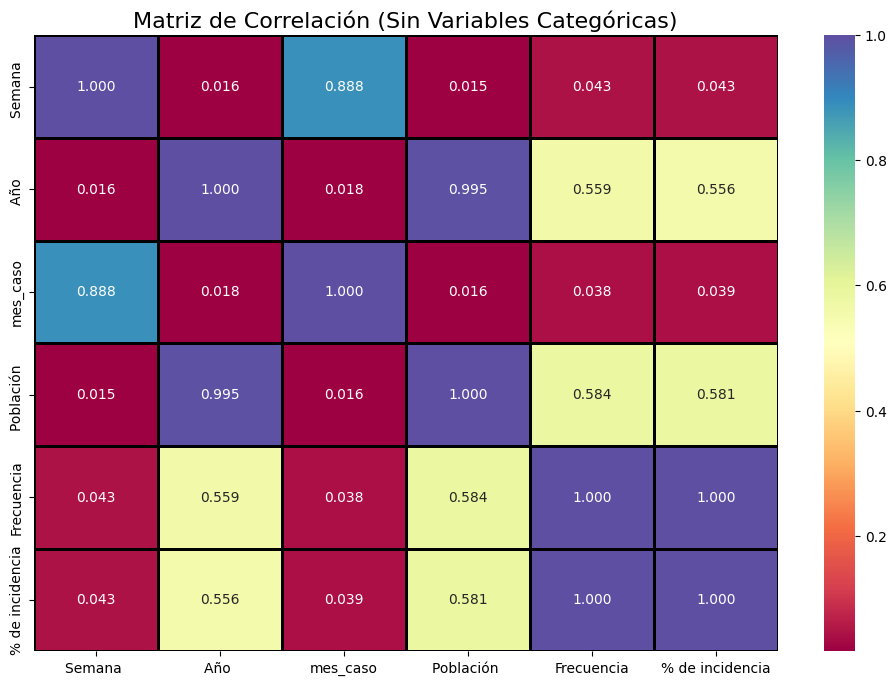

In [19]:
df_numeric = df.drop(columns=categoric_col, errors='ignore')  # 'ignore' evita errores si alguna columna no existe

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="Spectral", linewidths=2, linecolor="#000000", fmt='.3f')
plt.title("Matriz de Correlación (Sin Variables Categóricas)", fontsize=16)
plt.show()

Se observa que no hay una correlación alta entre el porcentaje de incidencia y las otras variables originales.

### ANOVA
Se usa el test de ANOVA pra ver la relacion entre las variables categoricas y la variable objetivo

In [20]:
categoric_col = {'Sexo ', 'Grupo Edad', 'Mes ', 'Nombre Nacionalidad', 'Estrato'}
target_var = '% de incidencia'

print(f"Analizando la relación entre '{target_var}' (numérica) y variables categóricas usando ANOVA:")

for col in categoric_col:
    if col in df.columns:
        groups = [df[df[col] == cat][target_var].dropna() for cat in df[col].unique()]
        f_stat, p = stats.f_oneway(*groups)
        print(f"\n{col}: F-Statistic = {f_stat:.3f}, p-value = {p:.5f}")
        if p < 0.05:
            print(" → Relación significativa con la variable objetivo.")
        else:
            print(" → No hay evidencia suficiente de relación.")


Analizando la relación entre '% de incidencia' (numérica) y variables categóricas usando ANOVA:

Mes : F-Statistic = 3.719, p-value = 0.00003
 → Relación significativa con la variable objetivo.

Sexo : F-Statistic = 75.633, p-value = 0.00000
 → Relación significativa con la variable objetivo.

Nombre Nacionalidad: F-Statistic = nan, p-value = nan
 → No hay evidencia suficiente de relación.

Estrato: F-Statistic = nan, p-value = nan
 → No hay evidencia suficiente de relación.

Grupo Edad: F-Statistic = 20.546, p-value = 0.00000
 → Relación significativa con la variable objetivo.


<ipython-input-20-703a14684616>:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p = stats.f_oneway(*groups)



El análisis ANOVA muestra que Grupo Edad, Mes y Sexo tienen una relación significativa con el % de incidencia (p < 0.05), indicando que estas variables influyen en la incidencia del VIH. Estrato y Nombre Nacionalidad no presentan evidencia de relación (p = nan), sugiriendo que no afectan significativamente la incidencia o que los datos son insuficientes para concluir, En este caso es que no hay suficientes datos, ya qiue mas de la mitad de los datos en esas dos columnas son valores nulos.


### Pairplots

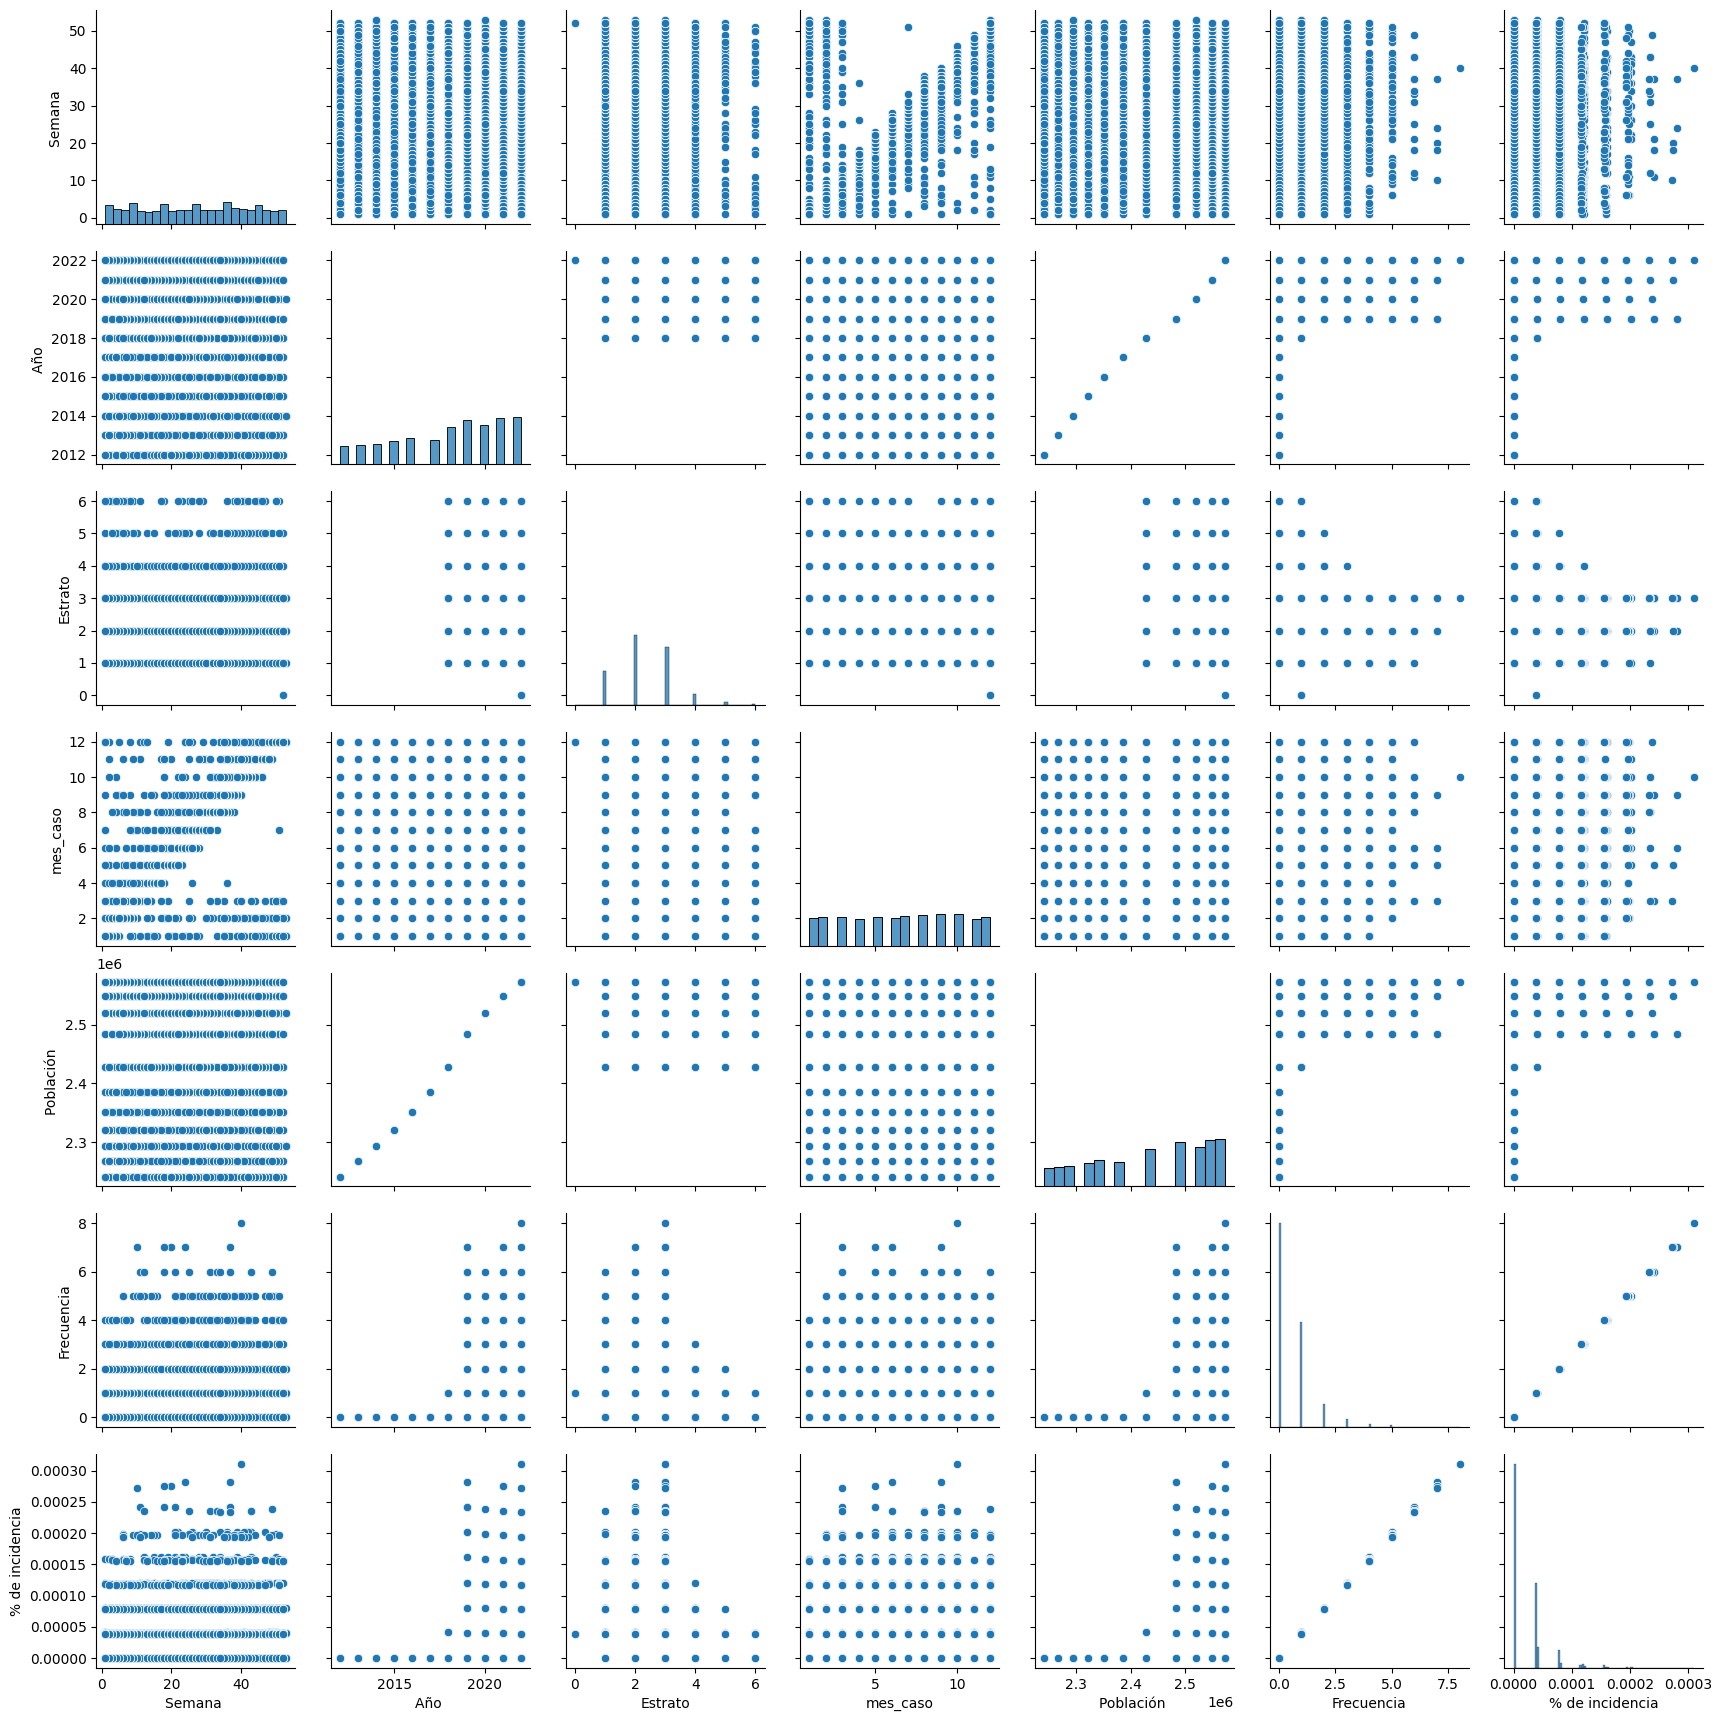

In [21]:
sns.pairplot(df)
plt.show()

En el pairplots, en la diagonal podemos obsevar el histograma de cada variable, observamos que la frecuencia (numero de casos) y % de incidencia, tieen una distribucion geom,etrica debiodo a que como esta todo segmentado, la mayor cantidad de datos son 1 o 2 y es menos frecuente los valores mayores, los estratos se comportan como una funcion normal, la poblacion aumenta y las columnas de fechas tienen una distribucion constante. En las demas casillas, podemos observar que a medida que el tiepo pasa, la poblacion aumenta de forma mas o menos lineas y lo mismo sucede con el numero de casos y % de incidencia.


### Resumen Estadístico de 'Número de Casos'

In [22]:
# Filtramos la columna "Número de Casos" para el análisis
casos = df['Frecuencia']

# Calcular estadísticos descriptivos
media_casos = casos.mean()
mediana_casos = casos.median()
desviacion_estandar_casos = casos.std()
percentiles = casos.quantile([0.25, 0.5, 0.75])
coeficiente_variacion = (desviacion_estandar_casos / media_casos) * 100  # en porcentaje

# Imprimir los resultados
print("Resumen Estadístico de 'Número de Casos':")
print(f"Media: {media_casos}")
print(f"Mediana: {mediana_casos}")
print(f"Desviación Estándar: {desviacion_estandar_casos}")
print(f"Percentil 25: {percentiles[0.25]}")
print(f"Percentil 50 (Mediana): {percentiles[0.5]}")
print(f"Percentil 75: {percentiles[0.75]}")
print(f"Coeficiente de Variación: {coeficiente_variacion}%")

Resumen Estadístico de 'Número de Casos':
Media: 0.590081799591002
Mediana: 0.0
Desviación Estándar: 0.9030992718247906
Percentil 25: 0.0
Percentil 50 (Mediana): 0.0
Percentil 75: 1.0
Coeficiente de Variación: 153.04645431374894%


Los valores estadistiocos se ven asi debido a que estan segmentados por sexo, grupo de edad y semana, para mejorar este analisis se agruparan por casos por semanas.

In [23]:
# Se agrupan los casos en casos por meses
df = df.sort_values(by='Semana ')

df_semanal = df.groupby('Semana ').agg({
    'Frecuencia': 'sum',
    '% de incidencia': 'sum'
}).reset_index()

# Filtramos la columna "Número de Casos" para el análisis
casos = df_semanal['Frecuencia']

# Calcular estadísticos descriptivos
media_casos = casos.mean()
mediana_casos = casos.median()
desviacion_estandar_casos = casos.std()
percentiles = casos.quantile([0.25, 0.5, 0.75])
coeficiente_variacion = (desviacion_estandar_casos / media_casos) * 100  # en porcentaje

# Imprimir los resultados
print("Resumen Estadístico de 'Número de Casos':")
print(f"Media: {media_casos}")
print(f"Mediana: {mediana_casos}")
print(f"Desviación Estándar: {desviacion_estandar_casos}")
print(f"Percentil 25: {percentiles[0.25]}")
print(f"Percentil 50 (Mediana): {percentiles[0.5]}")
print(f"Percentil 75: {percentiles[0.75]}")
print(f"Coeficiente de Variación: {coeficiente_variacion}%")

Resumen Estadístico de 'Número de Casos':
Media: 108.88679245283019
Mediana: 108.0
Desviación Estándar: 22.706031372030523
Percentil 25: 102.0
Percentil 50 (Mediana): 108.0
Percentil 75: 121.0
Coeficiente de Variación: 20.85287927079566%


Los datos del VIH muestran una media de 108.89 casos, con mediana de 108, indicando distribución simétrica. La desviación estándar de 22.71 y el coeficiente de variación del 20.85% reflejan moderada dispersión. Los percentiles (102, 108, 121) sugieren que la mayoría de los datos se concentran cerca de la media, con cierta variabilidad en los valores más altos.

### Graficas temporales

#### Tasa de Incidencia

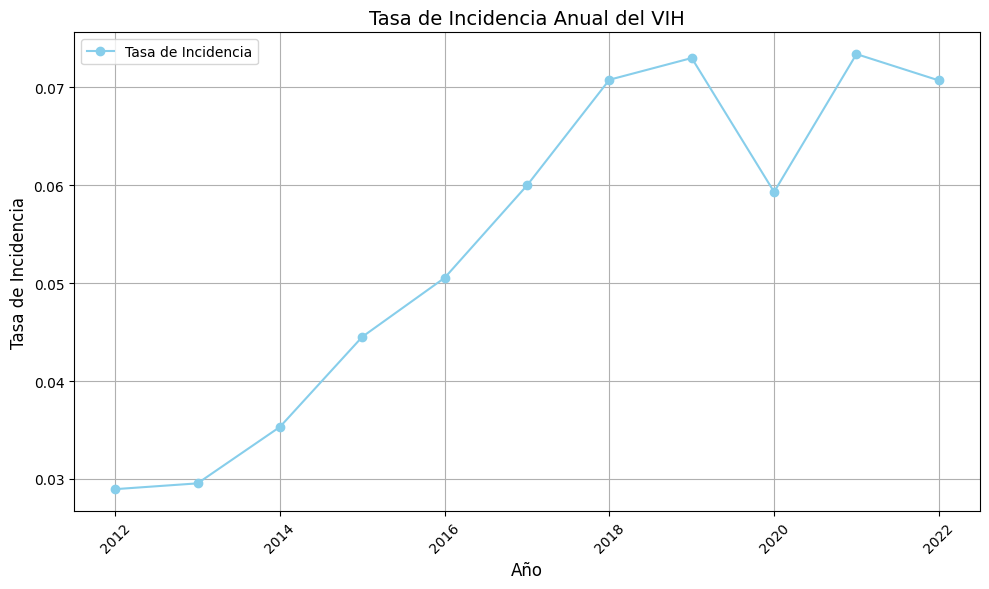

In [24]:
# Cargar el archivo y seleccionar la hoja "Numero de Casos Anual"
file_path = 'DATASET VIH.xlsx'
casos_anuales_df = pd.read_excel(file_path, sheet_name='Numero de Casos Anual')

# Limpiar los nombres de las columnas para evitar problemas con espacios
casos_anuales_df.columns = casos_anuales_df.columns.str.strip()

# Asegúrate de que las columnas 'Año' y 'Tasa de Incidencia' estén presentes
# Establecer el 'Año' como índice
casos_anuales_df.set_index('Año', inplace=True)

# Graficar la tasa de incidencia anual
plt.figure(figsize=(10, 6))
plt.plot(casos_anuales_df.index, casos_anuales_df['Tasa de Incidencia'], marker='o', color='skyblue', label='Tasa de Incidencia')
plt.title('Tasa de Incidencia Anual del VIH', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Tasa de Incidencia', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Prueba de Mann-Kendall La prueba de Mann-Kendall se utiliza para detectar tendencias en series temporales y es especialmente útil para datos que no siguen una distribución normal.

Resultado de la prueba de Mann-Kendall:
Tendencia: increasing
P-valor: 0.0001863808057631644
Estadístico Z: 3.73679493197531


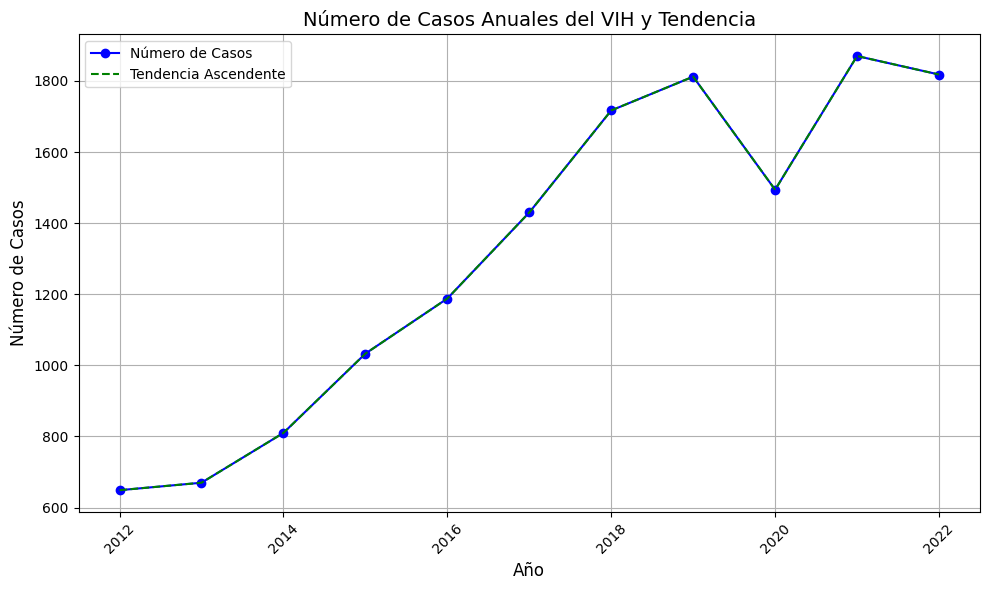

In [25]:
# Aplicar la prueba de Mann-Kendall para la columna 'Número de Casos'
result_mk = mk.original_test(casos_anuales_df['Número de Casos'])

# Mostrar los resultados de la prueba
print(f"Resultado de la prueba de Mann-Kendall:")
print(f"Tendencia: {result_mk.trend}")
print(f"P-valor: {result_mk.p}")
print(f"Estadístico Z: {result_mk.z}")  # Cambié Z por z

# Graficar los datos de los casos anuales con la línea de tendencia
plt.figure(figsize=(10, 6))
plt.plot(casos_anuales_df.index, casos_anuales_df['Número de Casos'], marker='o', color='b', label='Número de Casos')
plt.title('Número de Casos Anuales del VIH y Tendencia', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)

# Si hay tendencia ascendente o descendente, graficar la tendencia
if result_mk.trend == 'increasing':
    plt.plot(casos_anuales_df.index, casos_anuales_df['Número de Casos'], color='green', linestyle='--', label='Tendencia Ascendente')
elif result_mk.trend == 'decreasing':
    plt.plot(casos_anuales_df.index, casos_anuales_df['Número de Casos'], color='red', linestyle='--', label='Tendencia Descendente')

plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Mapa de calor de la incidencia de casos

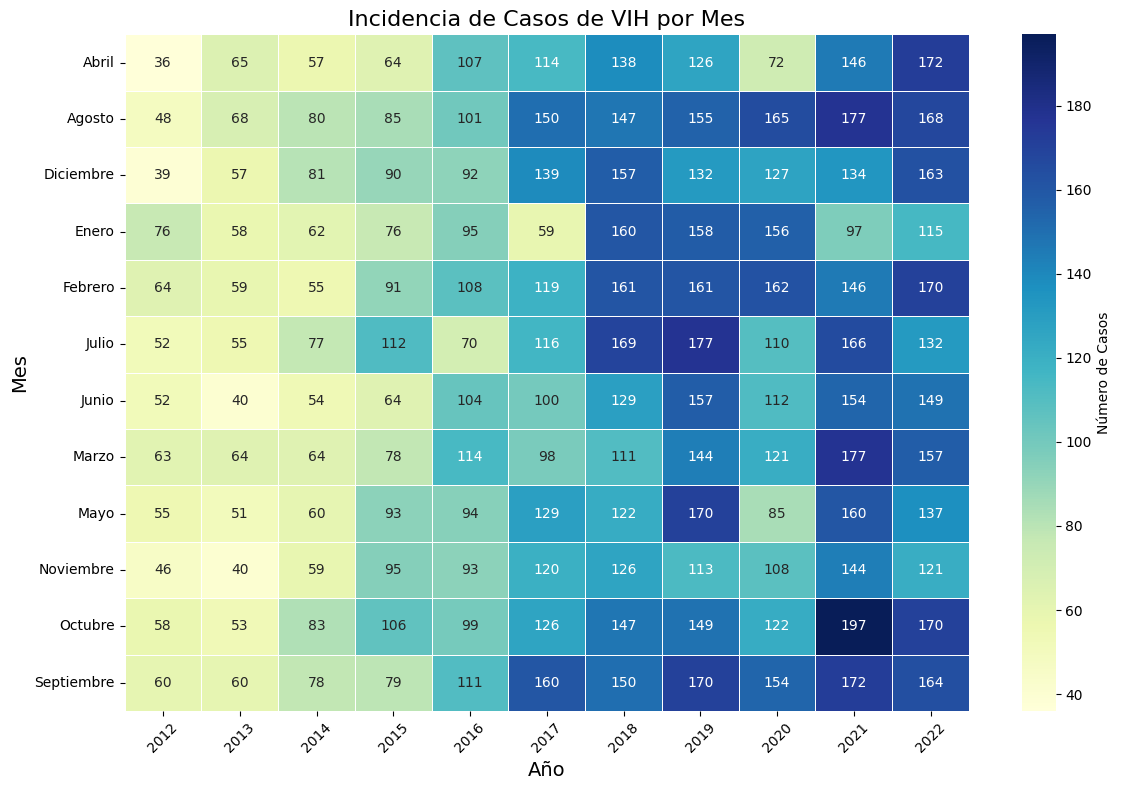

In [26]:
# Crear una tabla pivotante para la cantidad de casos por mes y año
pivot_table = casos_mensuales_df.pivot_table(index='Mes', columns='Año', values='Número de Casos', aggfunc='sum')

# Configuración de la gráfica
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Número de Casos'}, linewidths=0.5)

# Configuración de etiquetas y título
plt.title('Incidencia de Casos de VIH por Mes', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Mes', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

#### Gráfica de descomposición de componentes (observados, tendencia, estacionalidad y ruido)

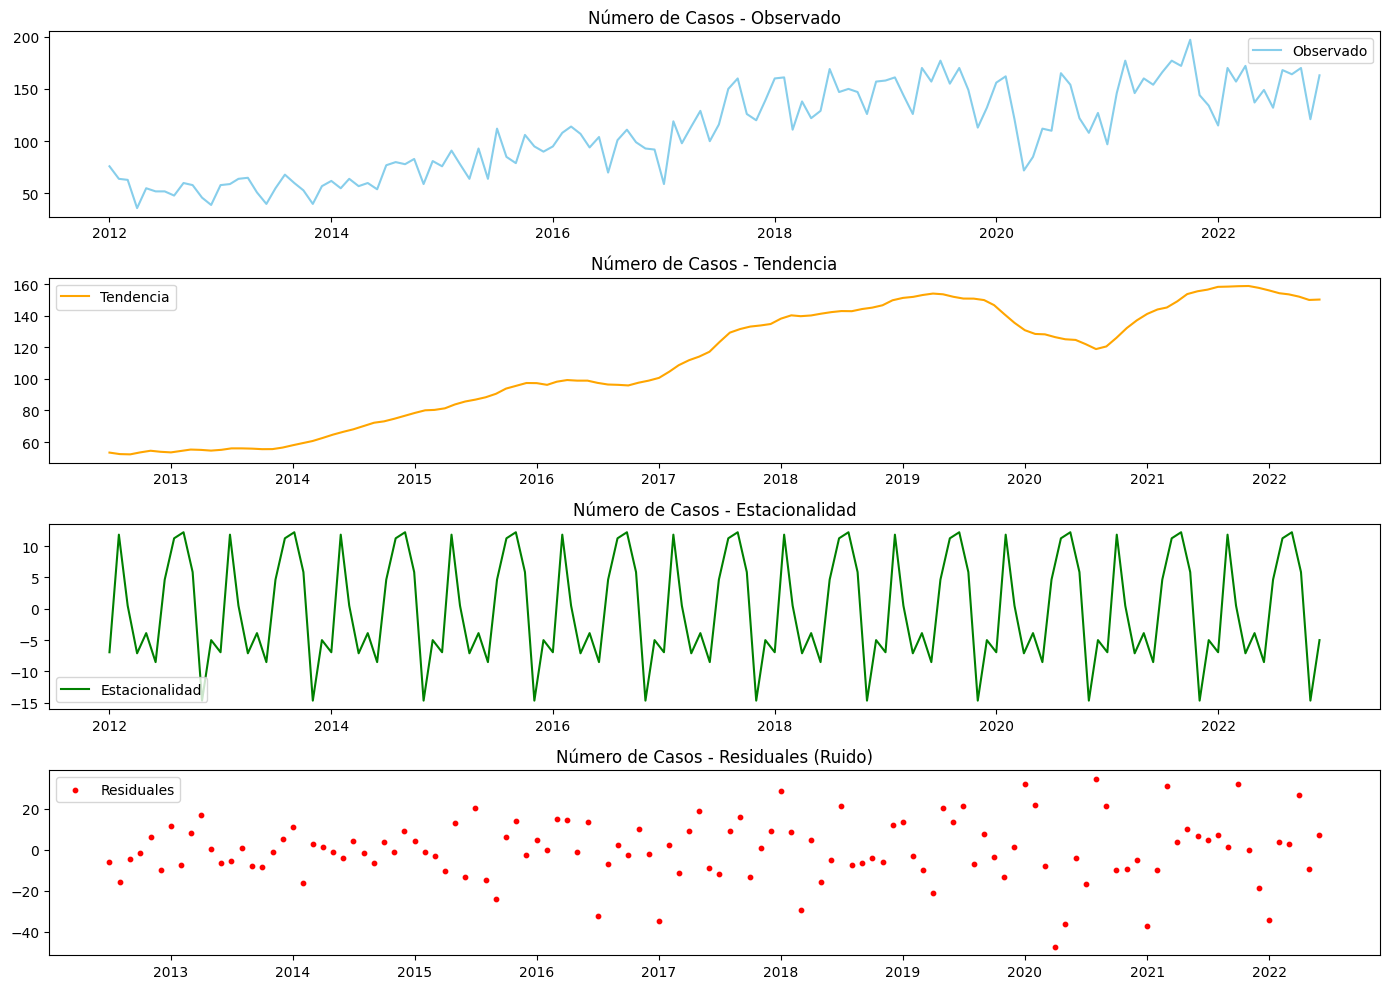

In [37]:
# Diccionario para convertir los nombres de los meses en español a números
meses = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

# Crear una nueva columna 'Mes_numero' para convertir los meses de texto a números
casos_mensuales_df['Mes_numero'] = casos_mensuales_df['Mes'].map(meses)

# Crear la columna de fecha combinando el año, mes (como número) y el día (1)
casos_mensuales_df['Fecha'] = pd.to_datetime(casos_mensuales_df['Año'].astype(str) + '-' +
                                              casos_mensuales_df['Mes_numero'].astype(str) + '-01')

# Establecer la fecha como índice
casos_mensuales_df.set_index('Fecha', inplace=True)

# Realizar la descomposición de la serie de tiempo
decomposition = sm.tsa.seasonal_decompose(casos_mensuales_df['Número de Casos'], model='additive', period=12)

# Graficar los componentes
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observado', color='skyblue')
plt.title('Número de Casos - Observado')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='orange')
plt.title('Número de Casos - Tendencia')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='green')
plt.title('Número de Casos - Estacionalidad')
plt.legend()

# Graficar los residuales con puntos
plt.subplot(414)
plt.scatter(decomposition.resid.index, decomposition.resid, label='Residuales', color='red', s=10)
plt.title('Número de Casos - Residuales (Ruido)')
plt.legend()

# Mostrar todas las gráficas
plt.tight_layout()
plt.show()

### Preprocesamiento
Para el entrenamiento del modelo y un mejor analisis hay que preprocesar los datos

#### Fechas
tenemos 4 columnas que hablan de las fechas: año, semana y me (en numero y nombre). por lo que es recomendable convertirlo en una sola para hacer predicciones. Se asumira que el dia de la semana que se registran los datos es el lunes.

Se crea la fecha

In [38]:
df['Fecha'] = pd.to_datetime(
    df['Año'].fillna(0).astype(int).astype(str) + '-' +  # Fill NaN with 0 for 'Año'
    df['Semana'].fillna(0).astype(int).astype(str) + '-1',  # Fill NaN with 0 for 'Semana'
    format='%Y-%W-%w',
    errors='coerce'  # Handle errors by setting to NaT
)

Se mueve la Fecha al comienzo

In [39]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Fecha')))
df = df.reindex(columns=cols)

Se eliminan las columnas de fecha

In [40]:
df = df.drop(columns=['Año', 'Semana', 'mes_caso', 'Mes'])

Se muestra como quedo el dataframe

In [41]:
df.sample(5)

,Fecha,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,Población,Frecuencia,% de incidencia
7999,2012-06-25,NaN,F,NaN,30-34,2240690.0,0.0,0.000000
8701,2018-07-16,NaN,M,2.0,30-34,2427129.0,0.0,0.000000
10962,2020-09-07,COLOMBIA,F,3.0,15-19,2519592.0,1.0,0.000040
7498,2016-06-20,NaN,F,NaN,50-54,2351077.0,0.0,0.000000
6399,2021-05-24,COLOMBIA,M,3.0,50-54,2549008.0,1.0,0.000039


#### Sexo
Debido a que es una variable categorica, se usara label encoding para variables binariasMsto gracias a que solo son dos categorias y se puede repreentar de forma numerica de esa forma.

In [42]:
df['Sexo'] = df['Sexo'].map({'M': 1, 'F': 0})

Se muestra el resultado

In [43]:
df.sample(5)

,Fecha,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,Población,Frecuencia,% de incidencia
15461,2015-01-05,NaN,1,NaN,30-34,2293601.0,0.0,0.000000
14672,2020-12-07,COLOMBIA,1,3.0,25-29,2519592.0,2.0,0.000079
12635,2014-10-20,NaN,1,NaN,15-19,2293601.0,0.0,0.000000
701,2014-01-27,NaN,1,NaN,30-34,2293601.0,0.0,0.000000
5364,2017-04-03,NaN,0,NaN,40-44,2385018.0,0.0,0.000000


#### Población
La pasamos a valores enteros ya que estos datos representan la cantidad de habitantes.

In [44]:
df['Población'] = df['Población'].astype(int)

Se muestra el reultado

In [45]:
df.head()

,Fecha,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,Población,Frecuencia,% de incidencia
8,2012-01-02,COLOMBIA,1,NaN,20-24,2240690,0.0,0.000000
7,2012-01-02,COLOMBIA,1,NaN,35-39,2240690,0.0,0.000000
165,2022-01-03,COLOMBIA,1,2.0,65-69,2572350,1.0,0.000039
2706,2017-01-02,NaN,1,NaN,35-39,2385018,0.0,0.000000
2705,2017-01-02,NaN,0,NaN,55-59,2385018,0.0,0.000000


#### Grupo Edad
Est columna representa categorias de edad, pero debido a su naturaleza, estas representan de cierta forma un valor continuo de edad que va avanzando a medida que la persona envejece, por lo cual, es util convertirlo a valores continuos en vez de usar one-hot encoding para categorias, para llevar esto a caba, el valor sera reemplazado con el valor medio del grupo.

In [46]:
def calcular_valor_medio(rango):
    limite_inferior, limite_superior = map(int, rango.split('-'))
    return (limite_inferior + limite_superior) / 2

df['Grupo Edad'] = df['Grupo Edad'].apply(calcular_valor_medio)

Se muestra el resultado

In [47]:
df.sample(5)

,Fecha,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,Población,Frecuencia,% de incidencia
14952,2021-12-13,COLOMBIA,1,2.0,17.0,2549008,1.0,0.000039
14824,2017-12-11,NaN,1,NaN,47.0,2385018,0.0,0.000000
9916,2018-08-13,NaN,1,1.0,37.0,2427129,0.0,0.000000
9126,2018-07-30,NaN,1,2.0,47.0,2427129,0.0,0.000000
14588,2017-12-04,NaN,1,NaN,47.0,2385018,0.0,0.000000


#### Nombre Nacionalidad

In [48]:
# Se hace One Hot Encoding para la nacionalidas
df = pd.get_dummies(df, columns=['Nombre Nacionalidad'], prefix='Nacionalidad')

# Convertir los valores de las columnas dummy a 1 (True) y 0 (False)
for col in df.columns:
    if col.startswith('Nacionalidad_'):
        df[col] = df[col].astype(int)  # Asegura que los valores sean 1 y 0

Se muestra el resultado

In [49]:
df.sample(5)

,Fecha,Sexo,Estrato,Grupo Edad,Población,Frecuencia,% de incidencia,Nacionalidad_AFGANISTAN,Nacionalidad_ARGENTINA,Nacionalidad_BOSNIA,...,Nacionalidad_ESPAÑA,Nacionalidad_ESTADOS UNIDOS,Nacionalidad_MALTA,Nacionalidad_MEXICO,Nacionalidad_PANAMA,Nacionalidad_PARAGUAY,Nacionalidad_POLONIA,Nacionalidad_PUERTO RICO,Nacionalidad_REINO UNIDO,Nacionalidad_VENEZUELA
15147,2019-12-23,1,6.0,27.0,2483545,1.0,0.00004,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,2015-01-12,1,NaN,27.0,2320791,0.0,0.00000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12714,2018-10-15,1,3.0,67.0,2427129,0.0,0.00000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9455,2019-08-05,1,1.0,32.0,2483545,0.0,0.00000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14922,2019-12-16,1,4.0,22.0,2483545,1.0,0.00004,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Estrato

In [50]:
# Se hace One Hot Encoding para el estrato
df = pd.get_dummies(df, columns=['Estrato'], prefix='Estrato')

# Convertir los valores de las columnas dummy a 1 (True) y 0 (False)
for col in df.columns:
    if col.startswith('Estrato_'):
        df[col] = df[col].astype(int)  # Asegura que los valores sean 1 y 0

Se muestra el resultado

In [51]:
df.sample(5)

,Fecha,Sexo,Grupo Edad,Población,Frecuencia,% de incidencia,Nacionalidad_AFGANISTAN,Nacionalidad_ARGENTINA,Nacionalidad_BOSNIA,Nacionalidad_BRASIL,...,Nacionalidad_PUERTO RICO,Nacionalidad_REINO UNIDO,Nacionalidad_VENEZUELA,Estrato_0.0,Estrato_1.0,Estrato_2.0,Estrato_3.0,Estrato_4.0,Estrato_5.0,Estrato_6.0
11132,2018-09-10,1,27.0,2427129,0.0,0.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2388,2020-02-24,1,22.0,2519592,2.0,0.000079,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
965,2018-01-29,1,57.0,2427129,0.0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14337,2012-11-12,0,27.0,2240690,0.0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15355,2019-12-30,1,27.0,2483545,3.0,0.000121,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Comprobaciones
Se comprueba los tipos de dato

In [52]:
# Tipo de datos
df.dtypes

,0
Fecha,datetime64[ns]
Sexo,int64
Grupo Edad,float64
Población,int64
Frecuencia,float64
% de incidencia,float64
Nacionalidad_AFGANISTAN,int64
Nacionalidad_ARGENTINA,int64
Nacionalidad_BOSNIA,int64
Nacionalidad_BRASIL,int64


Se comprueban valores nulos

In [53]:
# Valores nulos
df.isna().sum()

,0
Fecha,0
Sexo,0
Grupo Edad,0
Población,0
Frecuencia,0
% de incidencia,0
Nacionalidad_AFGANISTAN,0
Nacionalidad_ARGENTINA,0
Nacionalidad_BOSNIA,0
Nacionalidad_BRASIL,0


Hay valores nulos en Frecuencia y % de incidencia debido a que como esta todo segregado, si en una semana no hay contagio de hombres de 60 años por ejemplo, su valor es 0 y se toma como nulo, pero si se agregan todos por fecha se ve que no hay semanas en las que no hayan valores nulos

In [54]:
# Se agrupan por semanas para ver si hay valores nulos en alguna semana.
df = df.sort_values(by='Fecha')
df['Semana'] = df['Fecha'].dt.to_period('W')
df_semanal = df.groupby('Semana').agg({
    'Frecuencia': 'sum',
    '% de incidencia': 'sum'
}).reset_index()
df_semanal['Semana'] = df_semanal['Semana'].dt.to_timestamp()

# Valores nulos
df_semanal.isna().sum()

# Borrar la columna semana creada
df = df.drop(columns=['Semana'])

Todos los datos son numéricos, excepto la fecha que es formato fecha,y no tienen valores nulos. Por lo que ya estan listos para hacer mas graficas y el entrenamiento.

### Graficas preprocesados

#### Suma de Número de Casos y % de Incidencia Mensual
Se visualizaran los valores mensuales en vez de semanales como esta en el datset.

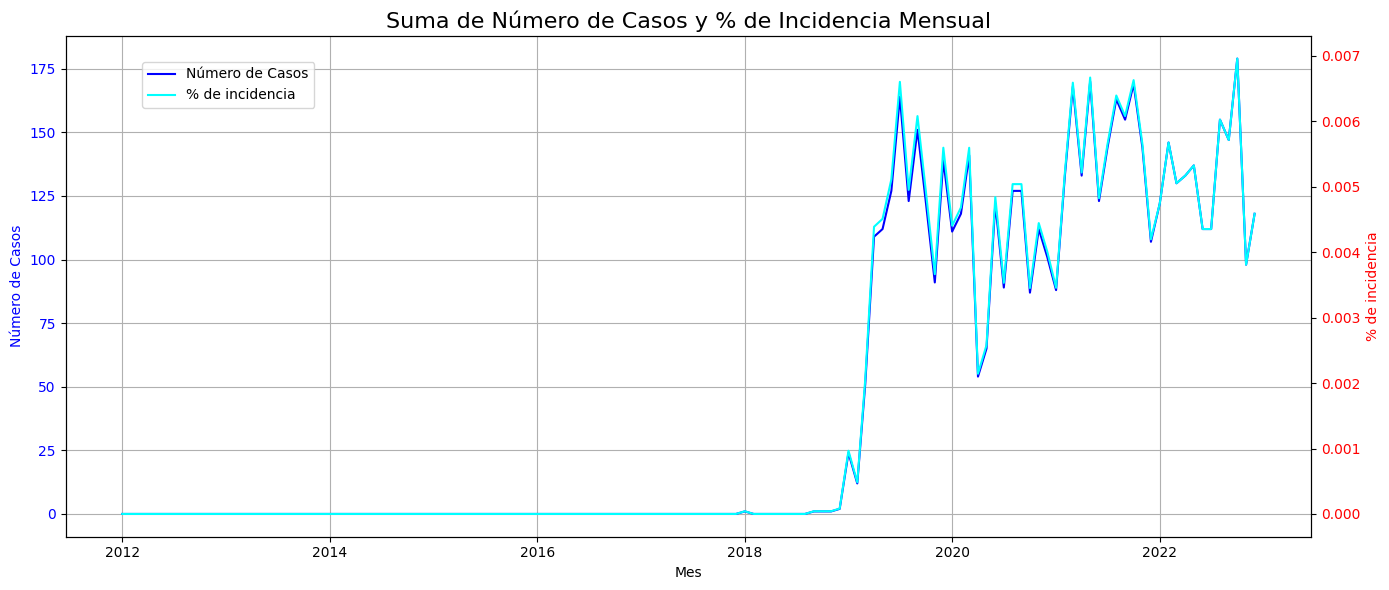

In [55]:
df = df.sort_values(by='Fecha')

df['Mes'] = df['Fecha'].dt.to_period('M')

df_mensual = df.groupby('Mes').agg({
    'Frecuencia': 'sum',
    '% de incidencia': 'sum'
}).reset_index()

df_mensual['Mes'] = df_mensual['Mes'].dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(df_mensual['Mes'], df_mensual['Frecuencia'], color='blue', label='Número de Casos')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Número de Casos', color='blue')  # Cambiar etiqueta aquí
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

ax2 = ax1.twinx()

ax2.plot(df_mensual['Mes'], df_mensual['% de incidencia'], color='cyan', label='% de incidencia')
ax2.set_ylabel('% de incidencia', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Suma de Número de Casos y % de Incidencia Mensual', fontsize=16)

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

Si en vez sumar los datos del mes y mostrarlos mes a mes, lo que hacemos es tomar los datos semanales y sumar en cada semana lo del un mes antes de esa semana, podemos mostrar la misma grafica con mayor resolución.

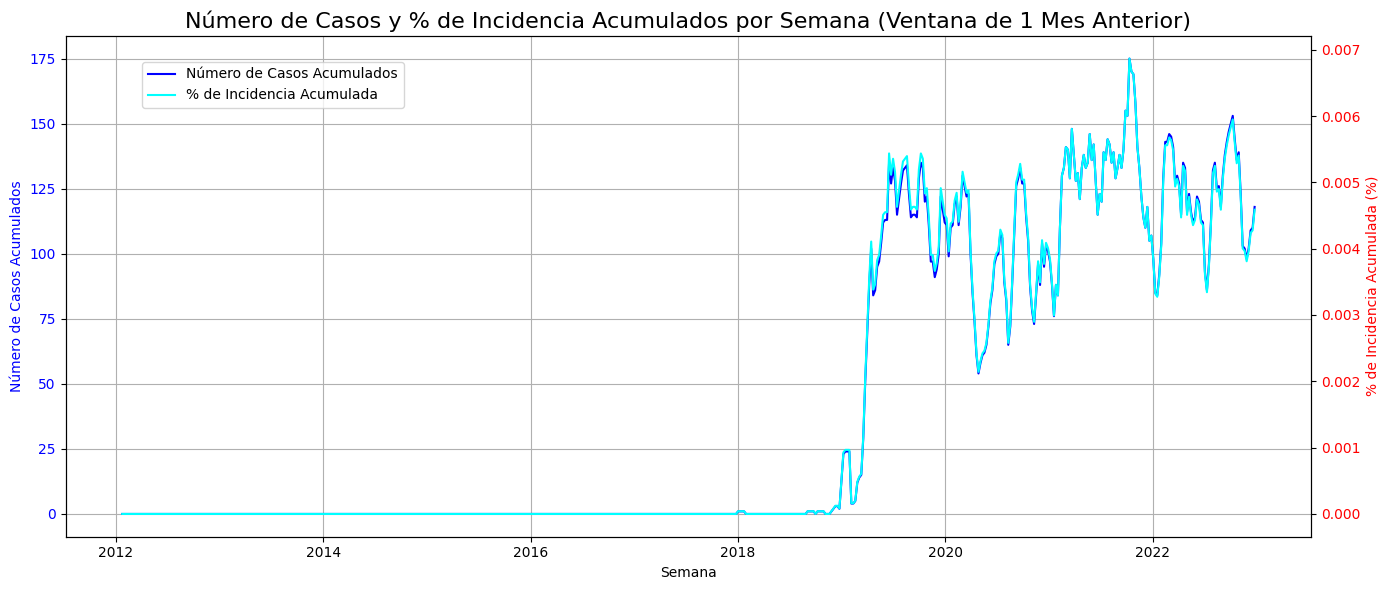

In [56]:
df['Semana'] = df['Fecha'].dt.to_period('W')  # Ejemplo: "2023-W01"

df_semanal = df.groupby('Semana').agg({
    'Frecuencia': 'sum',
    '% de incidencia': 'sum'
}).reset_index()

df_semanal['Semana'] = df_semanal['Semana'].dt.start_time

ventana = 4
df_semanal['Número de Casos Acumulados'] = (
    df_semanal['Frecuencia'].rolling(window=ventana, center=False).sum()
)
df_semanal['% de Incidencia Acumulada (%)'] = (
    df_semanal['% de incidencia'].rolling(window=ventana, center=False).sum()
)

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(df_semanal['Semana'], df_semanal['Número de Casos Acumulados'], color='blue', label='Número de Casos Acumulados')
ax1.set_xlabel('Semana')
ax1.set_ylabel('Número de Casos Acumulados', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

ax2 = ax1.twinx()

ax2.plot(df_semanal['Semana'], df_semanal['% de Incidencia Acumulada (%)'], color='cyan', label='% de Incidencia Acumulada')
ax2.set_ylabel('% de Incidencia Acumulada (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Número de Casos y % de Incidencia Acumulados por Semana (Ventana de 1 Mes Anterior)', fontsize=16)

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

#### Incidencia y casos por sexo

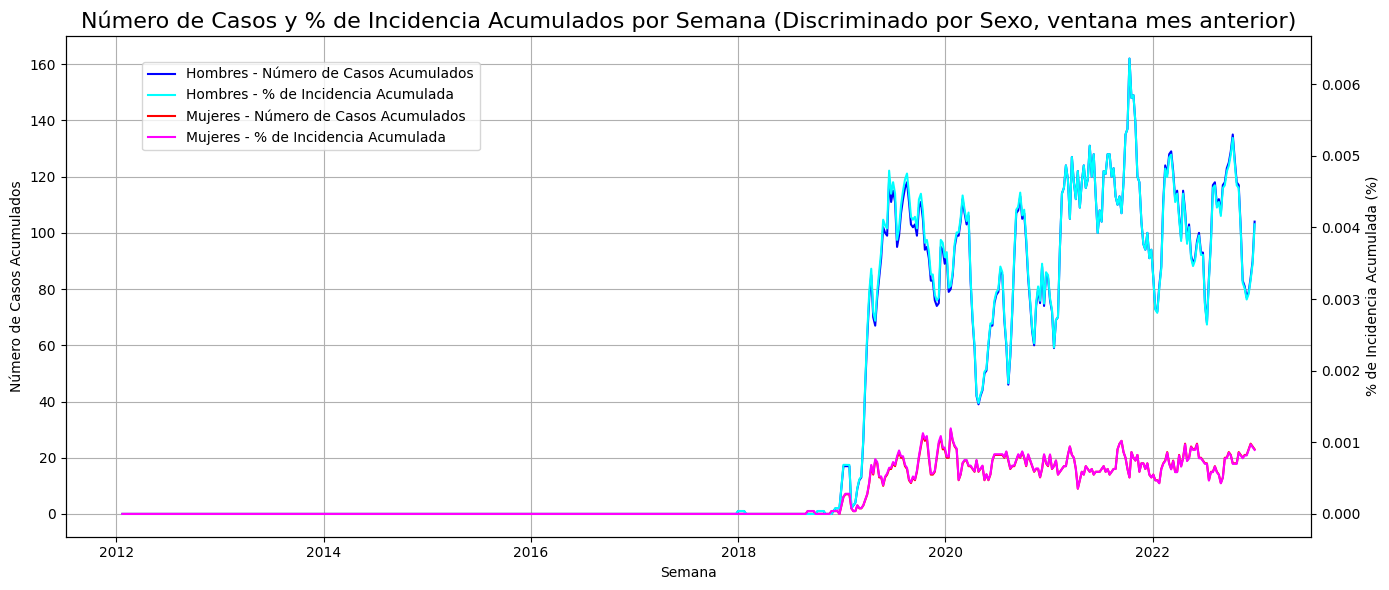

In [57]:
df_semanal = df.groupby(['Semana', 'Sexo']).agg({
    'Frecuencia': 'sum',
    '% de incidencia': 'sum'
}).reset_index()

df_semanal['Semana'] = df_semanal['Semana'].dt.start_time

ventana = 4

def calcular_acumulados(sexo):
    df_filtrado = df_semanal[df_semanal['Sexo'] == sexo].copy()  # Crear una copia explícita

    df_filtrado.loc[:, 'Número de Casos Acumulados'] = (
        df_filtrado['Frecuencia'].rolling(window=ventana, center=False).sum()
    )
    df_filtrado.loc[:, '% de Incidencia Acumulada (%)'] = (
        df_filtrado['% de incidencia'].rolling(window=ventana, center=False).sum()
    )

    return df_filtrado

df_hombres = calcular_acumulados(1)
df_mujeres = calcular_acumulados(0)

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(df_hombres['Semana'], df_hombres['Número de Casos Acumulados'], color='blue', label='Hombres - Número de Casos Acumulados')
ax1.plot(df_mujeres['Semana'], df_mujeres['Número de Casos Acumulados'], color='red', label='Mujeres - Número de Casos Acumulados')
ax1.set_xlabel('Semana')
ax1.set_ylabel('Número de Casos Acumulados', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

ax2 = ax1.twinx()

ax2.plot(df_hombres['Semana'], df_hombres['% de Incidencia Acumulada (%)'], color='cyan', label='Hombres - % de Incidencia Acumulada')
ax2.plot(df_mujeres['Semana'], df_mujeres['% de Incidencia Acumulada (%)'], color='magenta', label='Mujeres - % de Incidencia Acumulada')
ax2.set_ylabel('% de Incidencia Acumulada (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Número de Casos y % de Incidencia Acumulados por Semana (Discriminado por Sexo, ventana mes anterior)', fontsize=16)

handles, labels = [], []
for ax in [ax1, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

orden = [0, 2, 1, 3]
handles = [handles[i] for i in orden]
labels = [labels[i] for i in orden]

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

#### Mapa de calor para grupos de edad

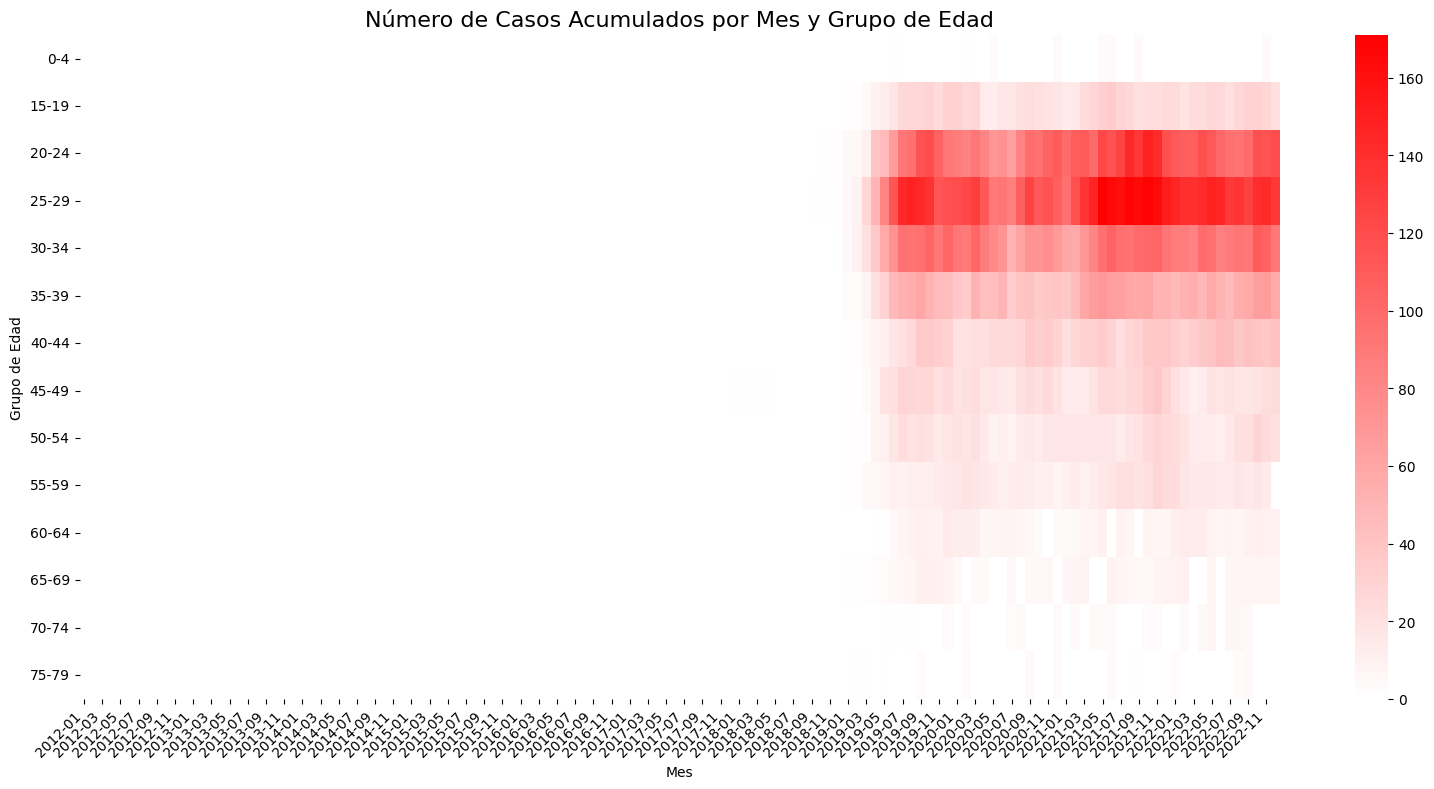

In [58]:
# Asegurarse de que 'Fecha' esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Clasificar los valores numéricos de 'Grupo Edad' en rangos
bins = [0, 4, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]
labels = ['0-4', '5-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
          '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
df['Grupo Edad Rango'] = pd.cut(df['Grupo Edad'], bins=bins, labels=labels, right=True)

# Extraer el año y el mes para agrupar por mes
df['Mes'] = df['Fecha'].dt.to_period('M')  # Ejemplo: "2023-01"

# Agrupar por mes y grupo de edad (rango), y calcular las métricas iniciales
df_mensual = df.groupby(['Mes', 'Grupo Edad Rango'], observed=True).agg({
    'Frecuencia': 'sum'          # Suma de frecuencias
}).reset_index()

# Convertir 'Mes' a datetime para graficar correctamente
df_mensual['Mes'] = df_mensual['Mes'].dt.to_timestamp()

# Calcular una ventana móvil de aproximadamente un mes (4 meses hacia atrás)
ventana = 4  # Ventana de 4 meses (un trimestre)

# Función para calcular acumulados por grupo de edad
def calcular_acumulados(df_mensual):
    # Crear una copia explícita del DataFrame
    df_filtrado = df_mensual.copy()

    # Calcular acumulados usando .rolling()
    df_filtrado['Número de Casos Acumulados'] = (
        df_filtrado.groupby('Grupo Edad Rango', observed=True)['Frecuencia']
                   .rolling(window=ventana, center=False).sum().reset_index(level=0, drop=True)
    )

    return df_filtrado

# Calcular acumulados
df_mensual = calcular_acumulados(df_mensual)

# Crear una matriz para el heatmap
heatmap_data = df_mensual.pivot(index='Mes', columns='Grupo Edad Rango', values='Número de Casos Acumulados')

# Reemplazar NaNs con 0 (en caso de que falten datos para alguna combinación)
heatmap_data = heatmap_data.fillna(0)

# Definir el orden deseado para los grupos de edad
orden_grupos_edad = [
    '0-4', '5-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
    '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79'
]

# Filtrar solo los grupos de edad que existen en los datos
grupos_disponibles = [grupo for grupo in orden_grupos_edad if grupo in heatmap_data.columns]
if not grupos_disponibles:
    raise ValueError("Ninguno de los grupos de edad especificados está presente en los datos.")

# Reorganizar las columnas según el orden deseado
heatmap_data = heatmap_data[grupos_disponibles]

# Formatear el índice de meses como "YYYY-MM"
heatmap_data.index = heatmap_data.index.strftime('%Y-%m')  # Mostrar solo año y mes

# Transponer los datos para colocar los grupos de edad en el eje vertical
heatmap_data = heatmap_data.T

# Crear una paleta de colores personalizada
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['white', 'red'])

# Crear el heatmap con la paleta personalizada
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap=custom_cmap, annot=False, linewidths=0)

# Configurar etiquetas y título
plt.title('Número de Casos Acumulados por Mes y Grupo de Edad', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Grupo de Edad')

# Rotar las etiquetas del eje vertical para que aparezcan horizontalmente
plt.yticks(rotation=0)  # Etiquetas horizontales

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

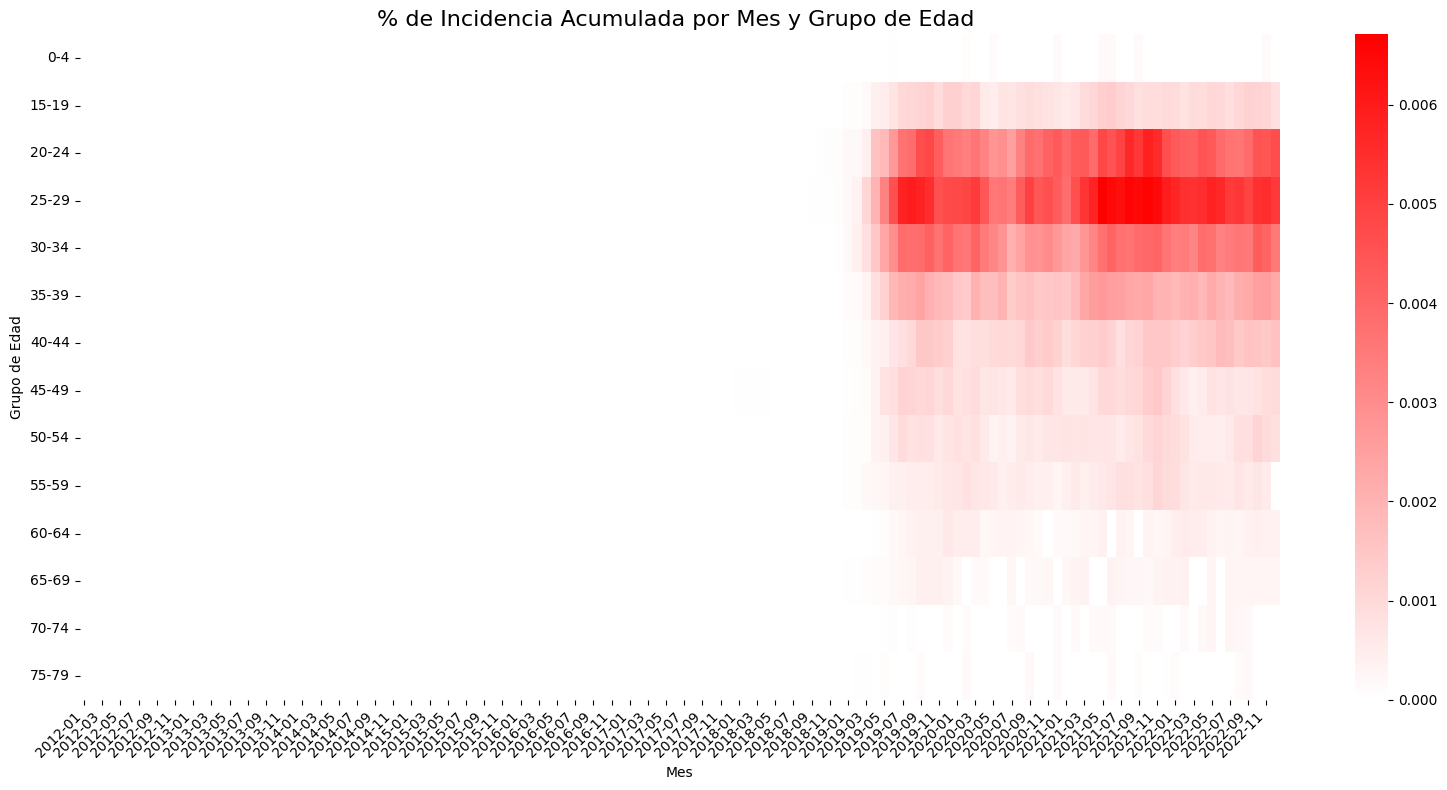

In [59]:
# Asegurarse de que 'Fecha' esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Clasificar los valores numéricos de 'Grupo Edad' en rangos
bins = [0, 4, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]
labels = ['0-4', '5-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
          '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
df['Grupo Edad Rango'] = pd.cut(df['Grupo Edad'], bins=bins, labels=labels, right=True)

# Extraer el año y el mes para agrupar por mes
df['Mes'] = df['Fecha'].dt.to_period('M')  # Ejemplo: "2023-01"

# Agrupar por mes y grupo de edad (rango), y calcular las métricas iniciales
df_mensual = df.groupby(['Mes', 'Grupo Edad Rango'], observed=True).agg({
    'Frecuencia': 'sum',          # Suma de frecuencias
    '% de incidencia': 'sum'      # Suma del porcentaje de incidencia
}).reset_index()

# Convertir 'Mes' a datetime para graficar correctamente
df_mensual['Mes'] = df_mensual['Mes'].dt.to_timestamp()

# Calcular una ventana móvil de aproximadamente un mes (4 meses hacia atrás)
ventana = 4  # Ventana de 4 meses (un trimestre)

# Función para calcular acumulados por grupo de edad
def calcular_acumulados(df_mensual):
    # Crear una copia explícita del DataFrame
    df_filtrado = df_mensual.copy()

    # Calcular acumulados usando .rolling() para el porcentaje de incidencia
    df_filtrado['% de Incidencia Acumulada'] = (
        df_filtrado.groupby('Grupo Edad Rango', observed=True)['% de incidencia']
                   .rolling(window=ventana, center=False).sum().reset_index(level=0, drop=True)
    )

    return df_filtrado

# Calcular acumulados
df_mensual = calcular_acumulados(df_mensual)

# Crear una matriz para el heatmap
heatmap_data = df_mensual.pivot(index='Mes', columns='Grupo Edad Rango', values='% de Incidencia Acumulada')

# Reemplazar NaNs con 0 (en caso de que falten datos para alguna combinación)
heatmap_data = heatmap_data.fillna(0)

# Definir el orden deseado para los grupos de edad
orden_grupos_edad = [
    '0-4', '5-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
    '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79'
]

# Filtrar solo los grupos de edad que existen en los datos
grupos_disponibles = [grupo for grupo in orden_grupos_edad if grupo in heatmap_data.columns]
if not grupos_disponibles:
    raise ValueError("Ninguno de los grupos de edad especificados está presente en los datos.")

# Reorganizar las columnas según el orden deseado
heatmap_data = heatmap_data[grupos_disponibles]

# Formatear el índice de meses como "YYYY-MM"
heatmap_data.index = heatmap_data.index.strftime('%Y-%m')  # Mostrar solo año y mes

# Transponer los datos para colocar los grupos de edad en el eje vertical
heatmap_data = heatmap_data.T

# Crear una paleta de colores personalizada
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['white', 'red'])

# Crear el heatmap con la paleta personalizada
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap=custom_cmap, annot=False, linewidths=0)

# Configurar etiquetas y título
plt.title('% de Incidencia Acumulada por Mes y Grupo de Edad ', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Grupo de Edad')

# Rotar las etiquetas del eje vertical para que aparezcan horizontalmente
plt.yticks(rotation=0)  # Etiquetas horizontales

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La mayor incidencia se presenta en el grupo etario de 25 a 29 años, disminuyendo progresivamente a medida que nos alejamos de ese rango. Además, se observa una tendencia general al aumento de la incidencia a lo largo del tiempo, lo que podría estar relacionado con cambios en factores de riesgo, detección o comportamiento poblacional.

## Entrenamiento

### Preparacion de los datos

In [60]:
df.head()

,Fecha,Sexo,Grupo Edad,Población,Frecuencia,% de incidencia,Nacionalidad_AFGANISTAN,Nacionalidad_ARGENTINA,Nacionalidad_BOSNIA,Nacionalidad_BRASIL,...,Estrato_0.0,Estrato_1.0,Estrato_2.0,Estrato_3.0,Estrato_4.0,Estrato_5.0,Estrato_6.0,Mes,Semana,Grupo Edad Rango
8,2012-01-02,1,22.0,2240690,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,2012-01,2012-01-02/2012-01-08,20-24
0,2012-01-02,1,62.0,2240690,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,2012-01,2012-01-02/2012-01-08,60-64
1239,2012-01-02,0,42.0,2240690,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,2012-01,2012-01-02/2012-01-08,40-44
3,2012-01-02,1,32.0,2240690,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,2012-01,2012-01-02/2012-01-08,30-34
1,2012-01-02,1,57.0,2240690,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,2012-01,2012-01-02/2012-01-08,55-59


In [61]:
# Eliminar la columnas generadas para las graficas
df = df.drop(columns=['Grupo Edad Rango', 'Mes', 'Semana'])

In [62]:
df.dtypes

,0
Fecha,datetime64[ns]
Sexo,int64
Grupo Edad,float64
Población,int64
Frecuencia,float64
% de incidencia,float64
Nacionalidad_AFGANISTAN,int64
Nacionalidad_ARGENTINA,int64
Nacionalidad_BOSNIA,int64
Nacionalidad_BRASIL,int64


In [63]:
# Datos nulos
df.isna().sum()

,0
Fecha,0
Sexo,0
Grupo Edad,0
Población,0
Frecuencia,0
% de incidencia,0
Nacionalidad_AFGANISTAN,0
Nacionalidad_ARGENTINA,0
Nacionalidad_BOSNIA,0
Nacionalidad_BRASIL,0


Se escalan los datos para el entrenamiento

In [64]:
df['Fecha_timestamp'] = df['Fecha'].astype('int64') // 10**9

df_numeric = df.drop(columns=['Fecha'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

print("Datos escalados:")
df_scaled.head()

Datos escalados:


,Sexo,Grupo Edad,Población,Frecuencia,% de incidencia,Nacionalidad_AFGANISTAN,Nacionalidad_ARGENTINA,Nacionalidad_BOSNIA,Nacionalidad_BRASIL,Nacionalidad_CHILE,...,Nacionalidad_REINO UNIDO,Nacionalidad_VENEZUELA,Estrato_0.0,Estrato_1.0,Estrato_2.0,Estrato_3.0,Estrato_4.0,Estrato_5.0,Estrato_6.0,Fecha_timestamp
0,0.512910,-0.965785,-1.827818,-0.65343,-0.653303,-0.010112,-0.014302,-0.010112,-0.010112,-0.010112,...,-0.010112,-0.277442,-0.014302,-0.328388,-0.504788,-0.446555,-0.177892,-0.08672,-0.062455,-2.153895
1,0.512910,2.052330,-1.827818,-0.65343,-0.653303,-0.010112,-0.014302,-0.010112,-0.010112,-0.010112,...,-0.010112,-0.277442,-0.014302,-0.328388,-0.504788,-0.446555,-0.177892,-0.08672,-0.062455,-2.153895
2,-1.949661,0.543272,-1.827818,-0.65343,-0.653303,-0.010112,-0.014302,-0.010112,-0.010112,-0.010112,...,-0.010112,-0.277442,-0.014302,-0.328388,-0.504788,-0.446555,-0.177892,-0.08672,-0.062455,-2.153895
3,0.512910,-0.211257,-1.827818,-0.65343,-0.653303,-0.010112,-0.014302,-0.010112,-0.010112,-0.010112,...,-0.010112,-0.277442,-0.014302,-0.328388,-0.504788,-0.446555,-0.177892,-0.08672,-0.062455,-2.153895
4,0.512910,1.675066,-1.827818,-0.65343,-0.653303,-0.010112,-0.014302,-0.010112,-0.010112,-0.010112,...,-0.010112,-0.277442,-0.014302,-0.328388,-0.504788,-0.446555,-0.177892,-0.08672,-0.062455,-2.153895


Se guarda el scaler

In [65]:
joblib.dump(scaler, "scaler.joblib")
print("Scaler guardado como 'scaler.joblib'")

Scaler guardado como 'scaler.joblib'


Aca hay un ejemplo de como volvr a los datos originales. Sera de utilidad despues a la hora de hacer predicciones

In [66]:
scaler = joblib.load("scaler.joblib")

df_original = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_numeric.columns)

df_original['Fecha'] = pd.to_datetime(df_original['Fecha_timestamp'].astype(int), unit='s')

df_original = df_original.drop(columns=['Fecha_timestamp'])

column_order = ['Fecha'] + [col for col in df_original.columns if col != 'Fecha']
df_original = df_original[column_order]

print("\nDatos originales recuperados:")
df_original.head()


Datos originales recuperados:


,Fecha,Sexo,Grupo Edad,Población,Frecuencia,% de incidencia,Nacionalidad_AFGANISTAN,Nacionalidad_ARGENTINA,Nacionalidad_BOSNIA,Nacionalidad_BRASIL,...,Nacionalidad_PUERTO RICO,Nacionalidad_REINO UNIDO,Nacionalidad_VENEZUELA,Estrato_0.0,Estrato_1.0,Estrato_2.0,Estrato_3.0,Estrato_4.0,Estrato_5.0,Estrato_6.0
0,2012-01-02,1.0,22.0,2240690.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.775558e-17,0.0,-3.469447e-18,0.0,0.0
1,2012-01-02,1.0,62.0,2240690.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.775558e-17,0.0,-3.469447e-18,0.0,0.0
2,2012-01-02,0.0,42.0,2240690.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.775558e-17,0.0,-3.469447e-18,0.0,0.0
3,2012-01-02,1.0,32.0,2240690.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.775558e-17,0.0,-3.469447e-18,0.0,0.0
4,2012-01-02,1.0,57.0,2240690.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.775558e-17,0.0,-3.469447e-18,0.0,0.0


Dividimos los datos en entrenamiento y prueba

In [67]:
X = df_scaled.drop(columns=['% de incidencia','Frecuencia'])
y = df_scaled['% de incidencia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creamos un df para guardar los resultados de la evaluación de los modelos